# Análisis flexibilidad

- Análisis de flexibilidad conformacional vs clase química:

para cada ligando, extraer de la matriz de autosimilitudes de USRRs los valores por encima de la diagonal. Juntar todos los valores de los ligandos de cada clase química, y representar, para cada una de ellas, la distribución en forma de violín plot o box plot. Hacer los correspondientes test estadísticos.

- Análisis de variabilidad de sitios de unión vs clase química:

para cada ligando, extraer de la matriz de autosimilitudes de USRRs de los correspondientes sitios de unión los valores por encima de la diagonal. Juntar todos los valores de los ligandos de cada clase química, y representar, para cada una de ellas, la distribución en forma de violín plot o box plot. Hacer los correspondientes test estadísticos.
Igual también es interesante representar adicionalmente autosimlitudes de USRRs de ligandos vs las de los correspondientes sitios de unión mediante un diagrama de dispersión: debería haber buena correlación.

- Análisis de variabilidad de sitios de unión vs clase de diana:

para cada proteína (uniprot id), extraer de la matriz de autosimilitudes de USRRs de sitios de unión los valores por encima de la diagonal. Juntar todos los valores de las proteínas de cada clase diana, y representar, para cada una de ellas, la distribución en forma de violín plot o box plot. Hacer los correspondientes test estadísticos.

In [ ]:
!pip install requests
!pip install pandarallel
!pip install rdkit

  Preparing metadata (setup.py) ... done
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16674 sha256=a6df11ae26d0c7b480d294fabbb67726d6a313034c942cff5f374a635fe21b27
  Stored in directory: /root/.cache/pip/wheels/b9/c6/5a/829298789e94348b81af52ab42c19d49da007306bbcc983827
Successfully built pandarallel
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 32.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Análisis de flexibilidad conformacional vs clase química:

para cada ligando, extraer de la matriz de autosimilitudes de USRRs los valores por encima de la diagonal. Juntar todos los valores de los ligandos de cada clase química, y representar, para cada una de ellas, la distribución en forma de violín plot o box plot. Hacer los correspondientes test estadísticos.

In [ ]:
#@title Abrir dataframes similitudes

import pandas as pd
import os

input_folder = "/content/drive/MyDrive/TFM/T3/Archivos"

diff = os.path.join(input_folder, "df_diff_conformacion.csv")
mism = os.path.join(input_folder, "df_misma_conf.csv")

df_diff_conformacion = pd.read_csv(diff, sep = ',')
df_misma_conf = pd.read_csv(mism, sep = ',')

df_unido = pd.concat([df_diff_conformacion, df_misma_conf])
print(df_unido.shape[0])

12195215


In [ ]:
#@title Abrir el dataframe

import pandas as pd

df_final = pd.read_csv("/content/drive/MyDrive/TFM/T3/Archivos/df_FINAL_tot.csv", sep=',')
df_final.shape[0]

70378

In [ ]:
df_final.columns

Index(['PDB_entry_id', 'Classification', 'Organism', 'Uniprot_id', 'Ligand_id',
       'Ligand_InChi', 'Experimental_method', 'Resolution',
       'Adding_Classification', 'Affinity', 'Coordenadas', 'Ligand_smiles',
       'Mol_Weight', 'n_atoms', 'Nombre', 'Ligand_Class', 'Pfam_Names',
       'SUPFAM_Names', 'intepro_class'],
      dtype='object')

In [ ]:
df_final['Ligand_Class'].value_counts()

Ligand_Class
Nucleosides, nucleotides, and analogues      17378
Organoheterocyclic compounds                 11086
Organic oxygen compounds                     10186
Organic acids and derivatives                 6764
Fatty Acyls                                   5672
Benzenoids                                    4978
Organic nitrogen compounds                    2984
Steroids and steroid derivatives              2718
Prenol lipids                                 1761
Glycerophospholipids                          1343
Glycerolipids                                 1258
Hydrocarbons                                  1250
Phenylpropanoids and polyketides              1181
Organosulfur compounds                         236
Organohalogen compounds                        119
Alkaloids and derivatives                      105
Sphingolipids                                   31
S-alkyl-CoAs                                    29
Hydrocarbon derivatives                         14
Saccharolipids                                  12
Organic salts                                   12
Lignans, neolignans and related compounds       12
Organometallic compounds                         9
Organophosphorus compounds                       7
Organic 1,3-dipolar compounds                    6
Alkyl-CoA disulfides                             6
Name: count, dtype: int64

In [ ]:
maps_class = {
    'Alkyl-CoA disulfides':'Nucleosides, nucleotides, and analogues',
    'S-alkyl-CoAs':'Nucleosides, nucleotides, and analogues',
    'Hydrocarbon derivatives':'Hydrocarbons and Hydrocarbon derivatives',
    'Hydrocarbons':'Hydrocarbons and Hydrocarbon derivatives',
    'Fatty Acyls':'Fatty Lipids',
    'Glycerolipids':'Fatty Lipids',
    'Glycerophospholipids':'Fatty Lipids',
    'Saccharolipids':'Fatty Lipids',
    'Sphingolipids':'Fatty Lipids',
    'Lignans, neolignans and related compounds':'Other',
    'Organometallic compounds':'Other',
    'Organophosphorus compounds':'Other',
    'Organic 1,3-dipolar compounds':'Other',
    'Organic salts':'Other'
}

df_final['Ligand_Class'] = df_final['Ligand_Class'].replace(maps_class)
df_final['Ligand_Class'].value_counts()

Ligand_Class
Nucleosides, nucleotides, and analogues     17413
Organoheterocyclic compounds                11086
Organic oxygen compounds                    10186
Fatty Lipids                                 8316
Organic acids and derivatives                6764
Benzenoids                                   4978
Organic nitrogen compounds                   2984
Steroids and steroid derivatives             2718
Prenol lipids                                1761
Hydrocarbons and Hydrocarbon derivatives     1264
Phenylpropanoids and polyketides             1181
Organosulfur compounds                        236
Organohalogen compounds                       119
Alkaloids and derivatives                     105
Other                                          46
Name: count, dtype: int64

In [ ]:
df_unido.head()

lig1             lig2       sim
0  4KSY_1SY_A_500   4LEZ_1SY_A_602  0.572659
1  4KSY_1SY_A_500   4O67_1SY_A_601  0.591050
2  4KSY_1SY_A_500  4O67_1SY_B_1101  0.595102
3  4KSY_1SY_A_500  7FTG_1SY_B_1101  0.594381
4  4KSY_1SY_A_500   8FLM_1SY_B_401  0.574865

In [ ]:
#@title Definir función extraer ligando

def find_ligand_instances(row: pd.Series) -> str:
  instance = row['lig1']
  ligand = instance.split("_")[1]
  return ligand

In [ ]:
#@title Aplicar función al df similitudes

from pandarallel import pandarallel

pandarallel.initialize(nb_workers= 2, progress_bar= True)

df_unido['Ligand_id'] = df_unido.parallel_apply(find_ligand_instances, axis = 1)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
#@title Clases químicas ligandos

df_clase = df_final[['Ligand_id','Ligand_Class']]
df_clase = df_clase.drop_duplicates(subset="Ligand_id").reset_index(drop=True)
df_clase.shape[0]

2871

In [ ]:
df_clase['Ligand_Class'].value_counts()

Ligand_Class
Organoheterocyclic compounds                783
Benzenoids                                  470
Organic acids and derivatives               381
Organic oxygen compounds                    327
Nucleosides, nucleotides, and analogues     252
Fatty Lipids                                191
Phenylpropanoids and polyketides            110
Organic nitrogen compounds                   82
Prenol lipids                                73
Steroids and steroid derivatives             61
Hydrocarbons and Hydrocarbon derivatives     17
Alkaloids and derivatives                    15
Organohalogen compounds                      10
Other                                         8
Organosulfur compounds                        7
Name: count, dtype: int64

In [ ]:
df_unido.head()

lig1             lig2       sim Ligand_id
0  4KSY_1SY_A_500   4LEZ_1SY_A_602  0.572659       1SY
1  4KSY_1SY_A_500   4O67_1SY_A_601  0.591050       1SY
2  4KSY_1SY_A_500  4O67_1SY_B_1101  0.595102       1SY
3  4KSY_1SY_A_500  7FTG_1SY_B_1101  0.594381       1SY
4  4KSY_1SY_A_500   8FLM_1SY_B_401  0.574865       1SY

In [ ]:
df_unido = df_unido.merge(df_clase, on = "Ligand_id", how = "left")


In [ ]:
df_unido.head()

lig1             lig2       sim Ligand_id  \
0  4KSY_1SY_A_500   4LEZ_1SY_A_602  0.572659       1SY   
1  4KSY_1SY_A_500   4O67_1SY_A_601  0.591050       1SY   
2  4KSY_1SY_A_500  4O67_1SY_B_1101  0.595102       1SY   
3  4KSY_1SY_A_500  7FTG_1SY_B_1101  0.594381       1SY   
4  4KSY_1SY_A_500   8FLM_1SY_B_401  0.574865       1SY   

                              Ligand_Class  
0  Nucleosides, nucleotides, and analogues  
1  Nucleosides, nucleotides, and analogues  
2  Nucleosides, nucleotides, and analogues  
3  Nucleosides, nucleotides, and analogues  
4  Nucleosides, nucleotides, and analogues

In [ ]:
df_1 = df_unido[df_unido['Ligand_Class']=="Nucleosides, nucleotides, and analogues"]
df_1.shape[0]

5914066

In [ ]:
df_unido['Ligand_Class'] = df_unido['Ligand_Class'].replace({"Hydrocarbons":"Hydrocarbons and Hydrocarbon derivatives"})

In [ ]:
clases = df_unido['Ligand_Class'].unique()
clases = [i for i in clases if pd.notna(i)]
print(clases)
print(len(clases))

['Nucleosides, nucleotides, and analogues', 'Other', 'Organic oxygen compounds', 'Organoheterocyclic compounds', 'Organic acids and derivatives', 'Phenylpropanoids and polyketides', 'Fatty Lipids', 'Benzenoids', 'Organosulfur compounds', 'Prenol lipids', 'Organic nitrogen compounds', 'Hydrocarbons and Hydrocarbon derivatives', 'Steroids and steroid derivatives', 'Alkaloids and derivatives', 'Organohalogen compounds']
15


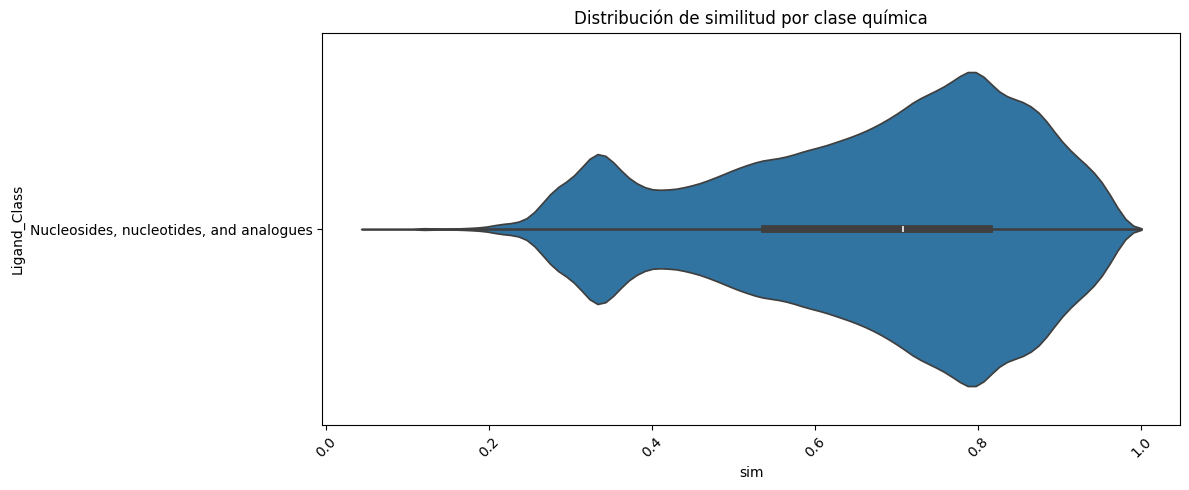

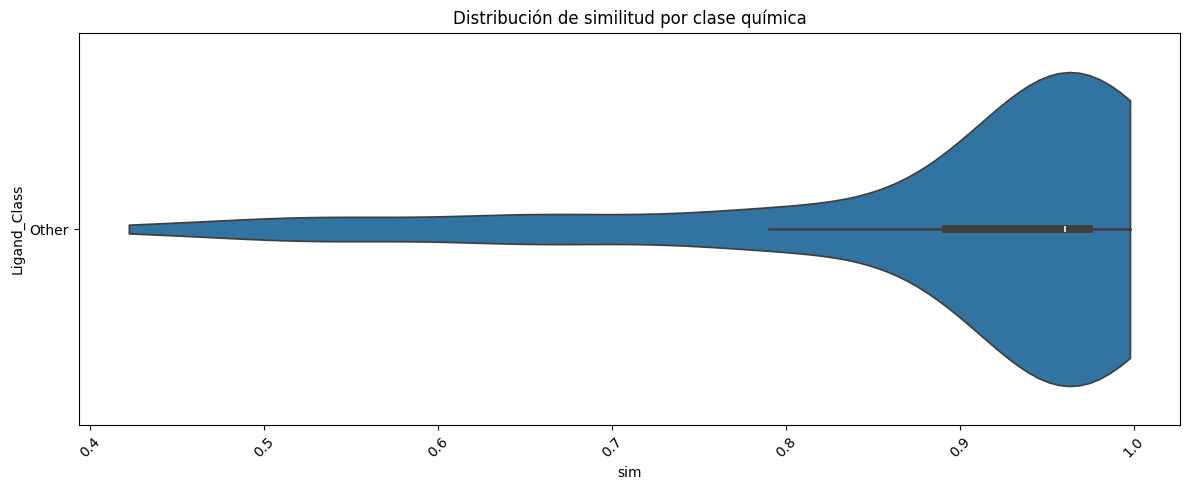

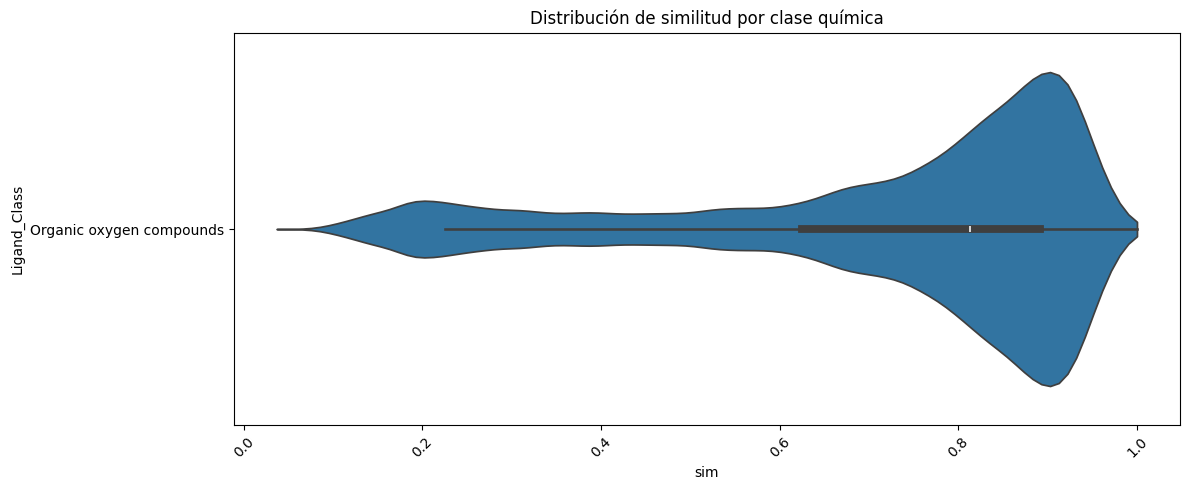

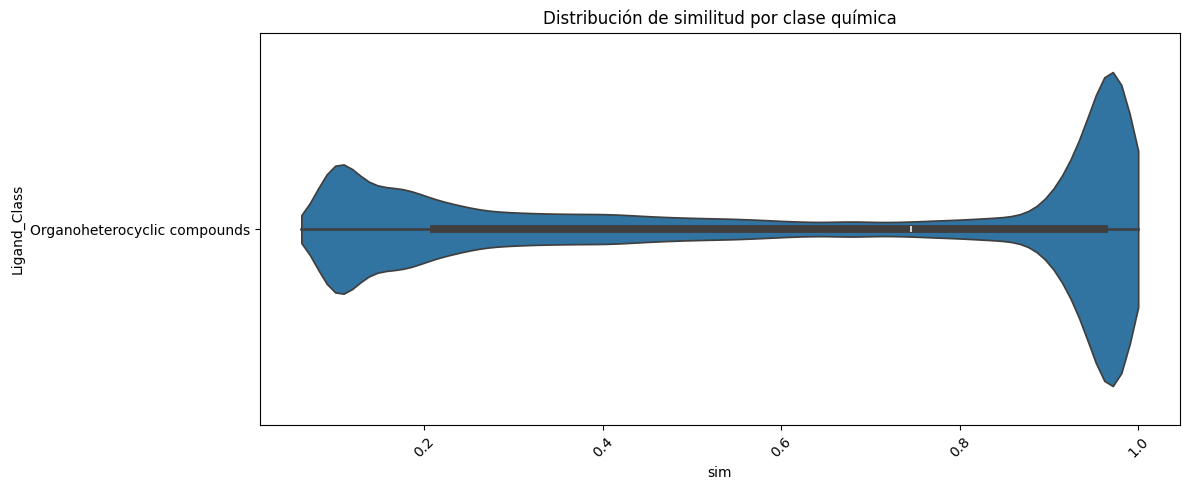

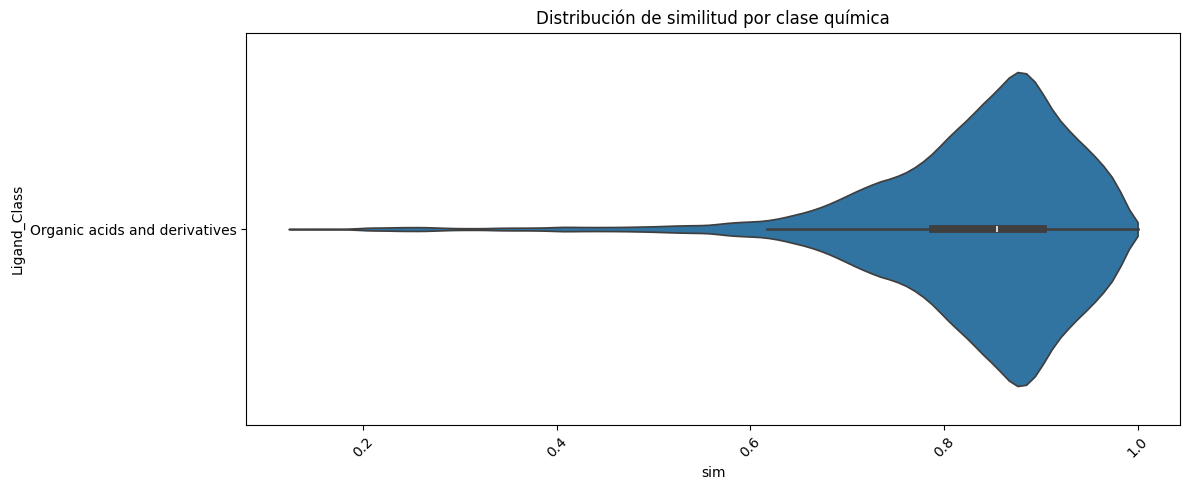

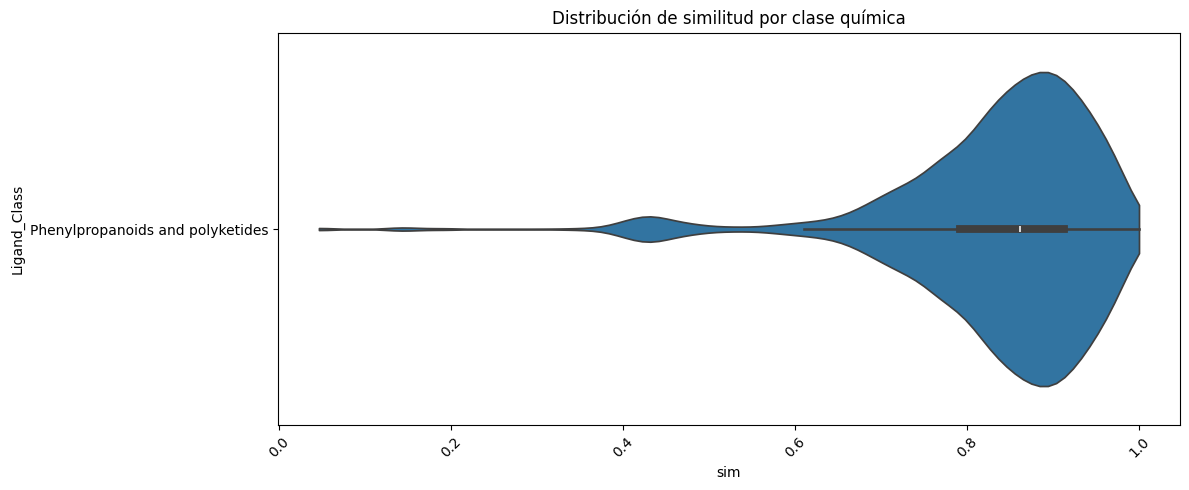

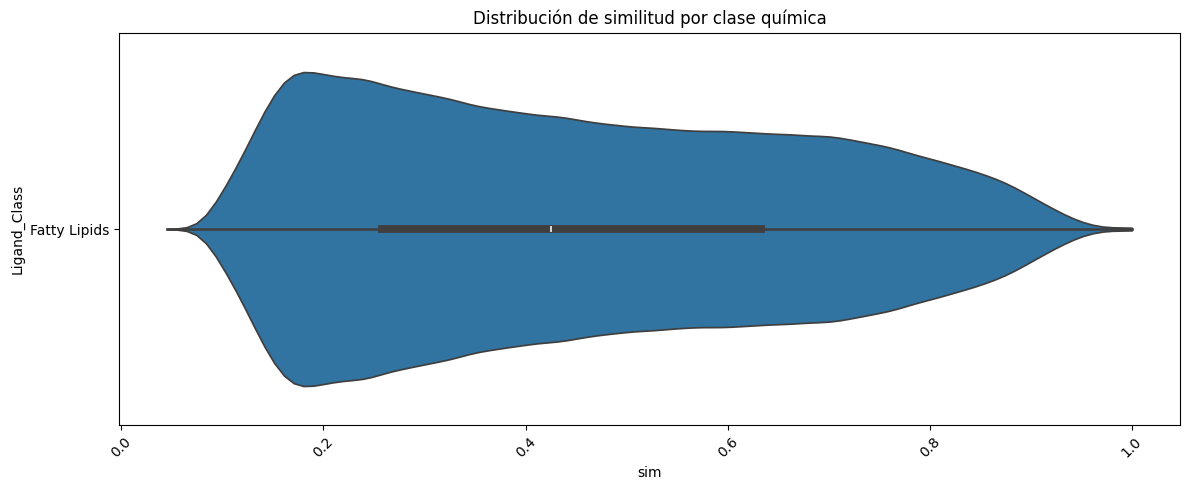

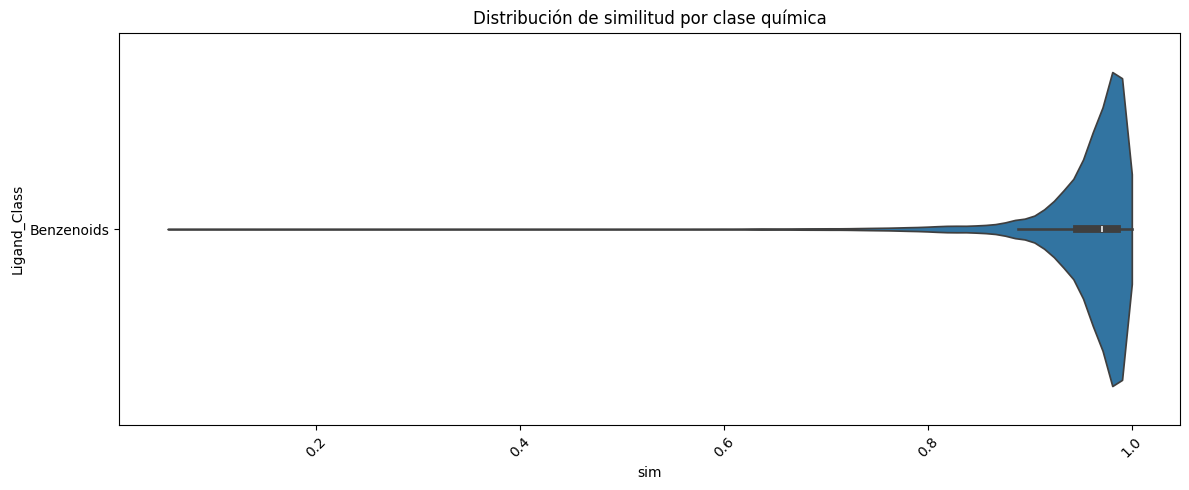

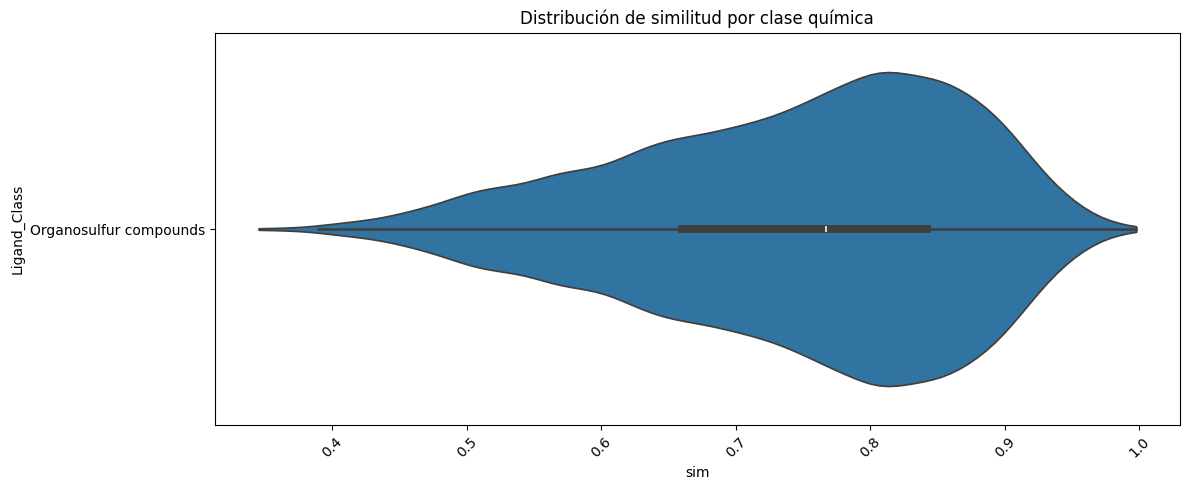

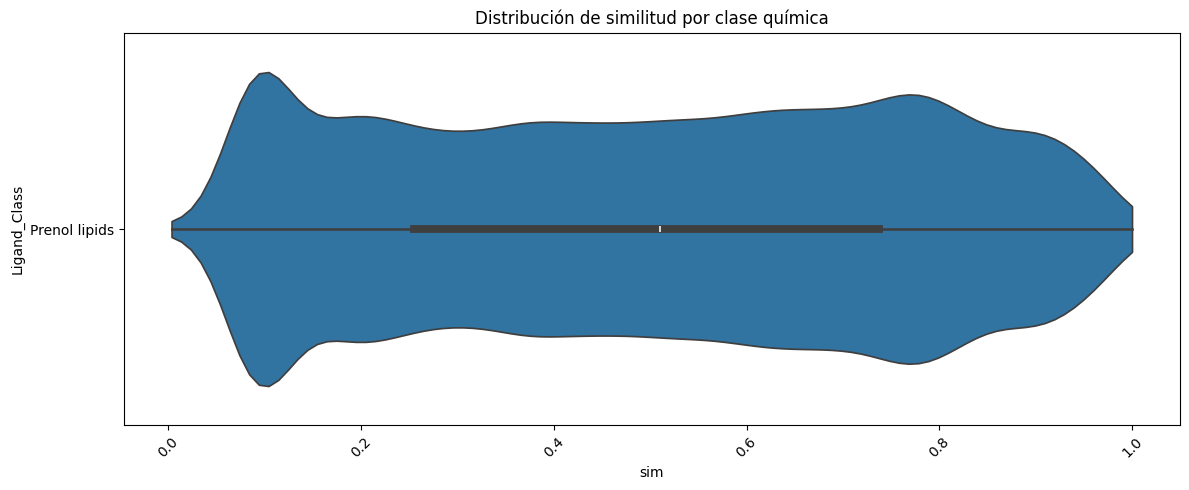

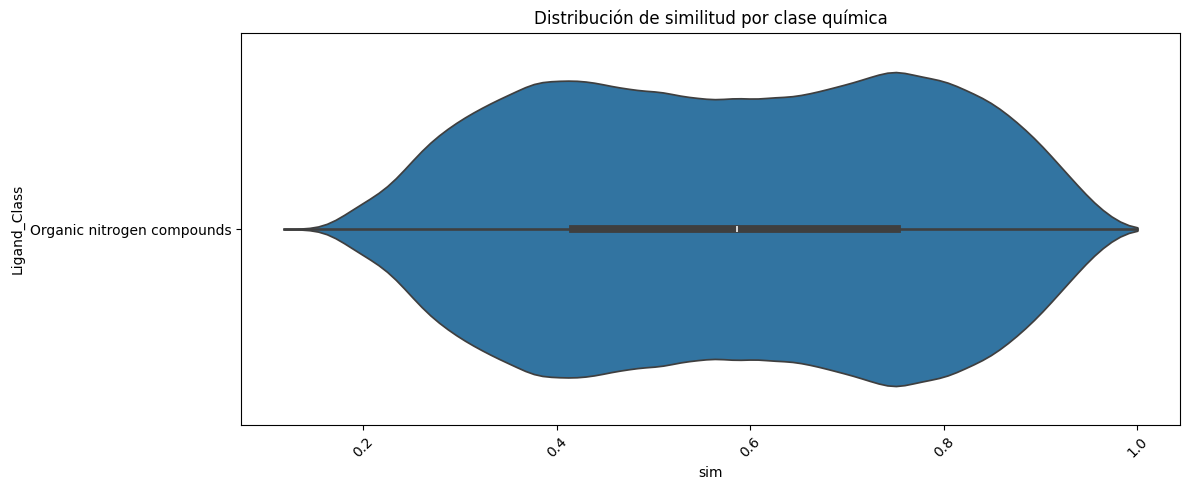

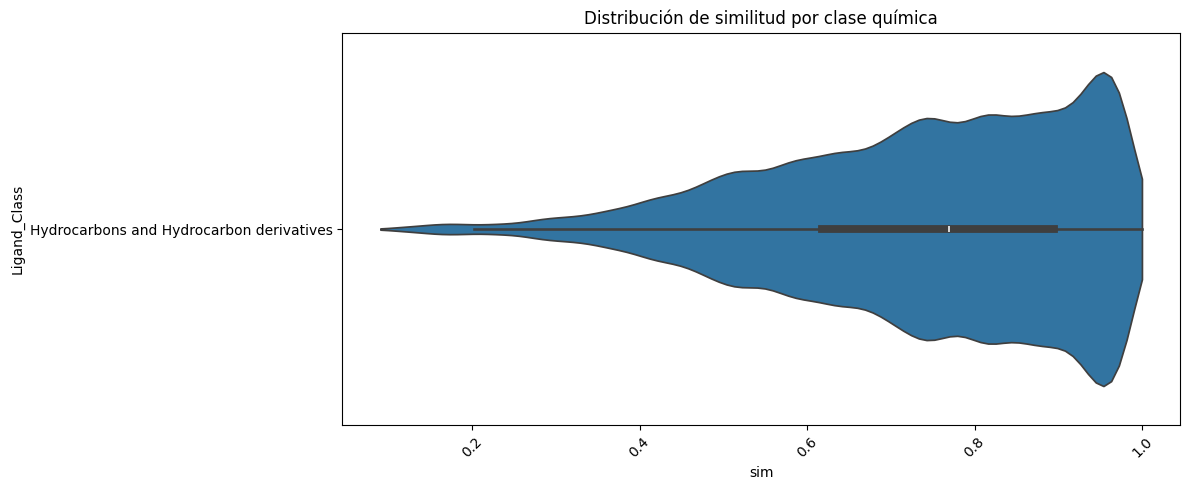

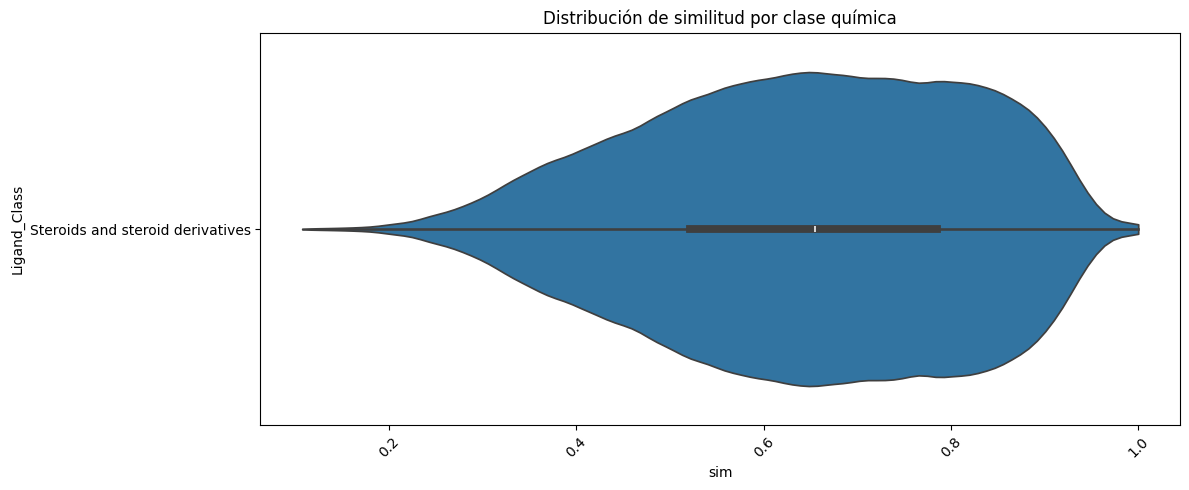

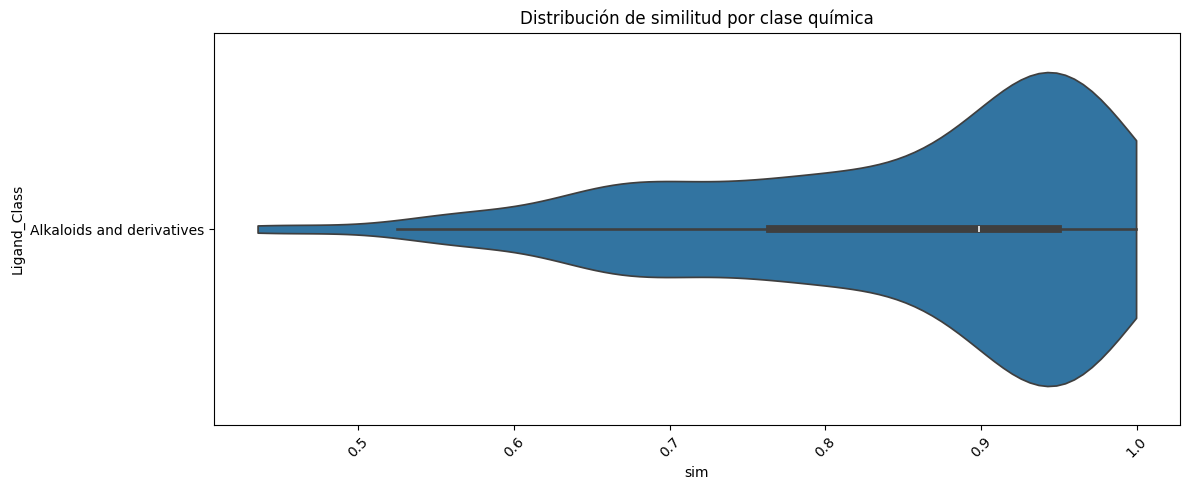

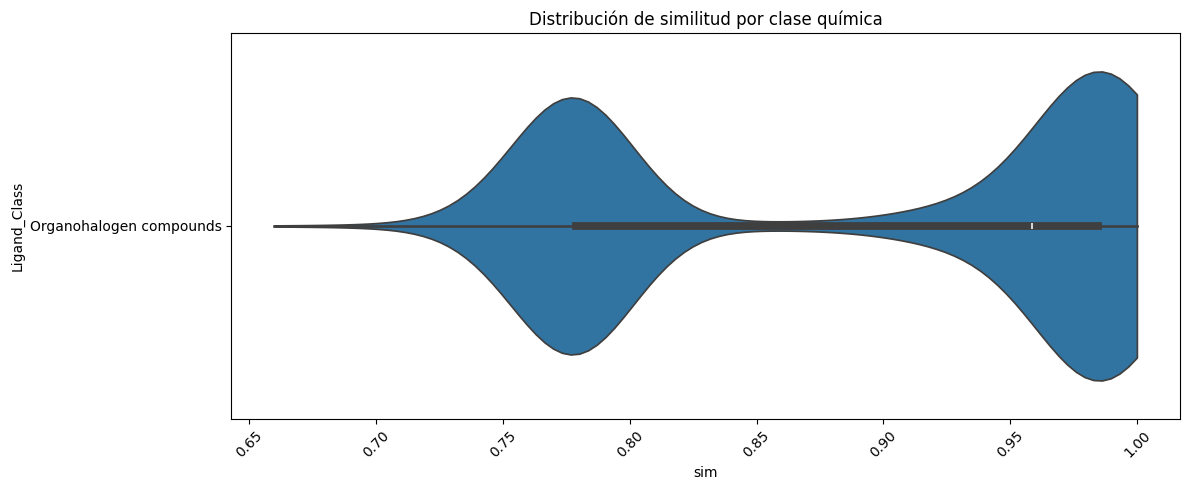

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

clases = df_unido['Ligand_Class'].unique()
clases = [i for i in clases if pd.notna(i)]

for clase in clases:
    plt.figure(figsize=(12, 5))
    sns.violinplot(data=df_unido[df_unido['Ligand_Class']== clase], x="sim", y="Ligand_Class", cut=0)
    plt.xticks(rotation=45)
    plt.title(f"Distribución de similitud por clase química")
    plt.tight_layout()
    plt.show()
    plt.close()

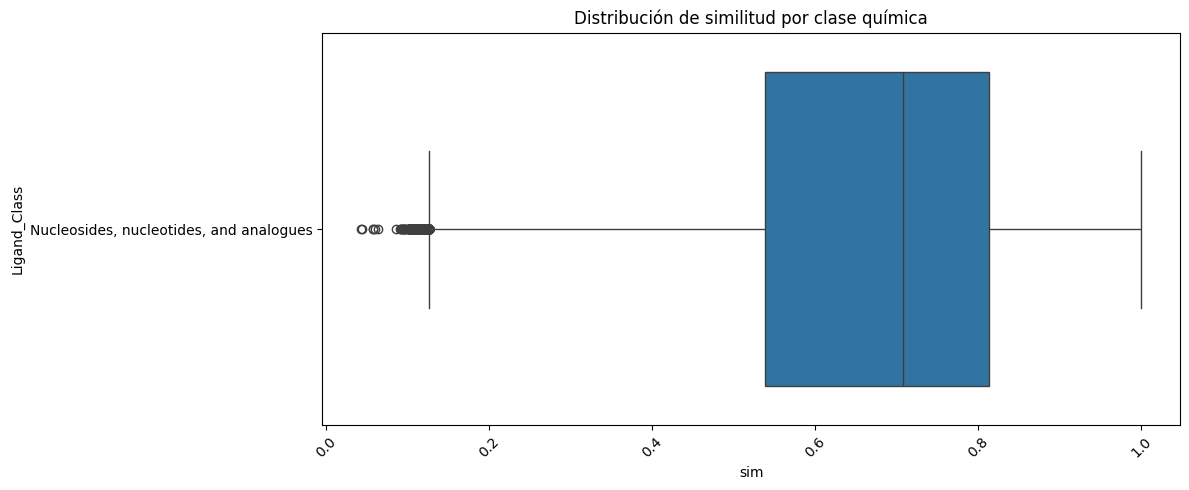

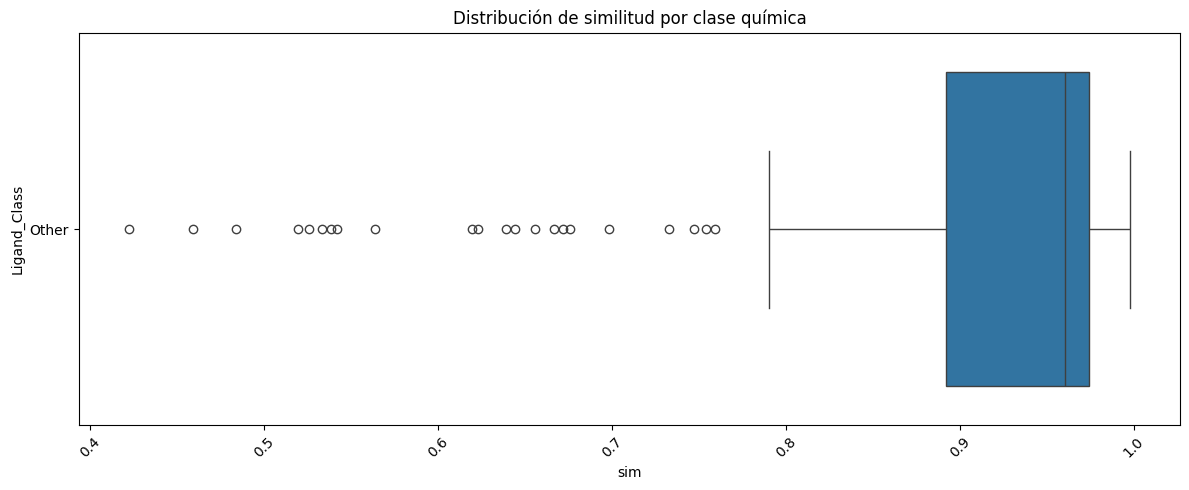

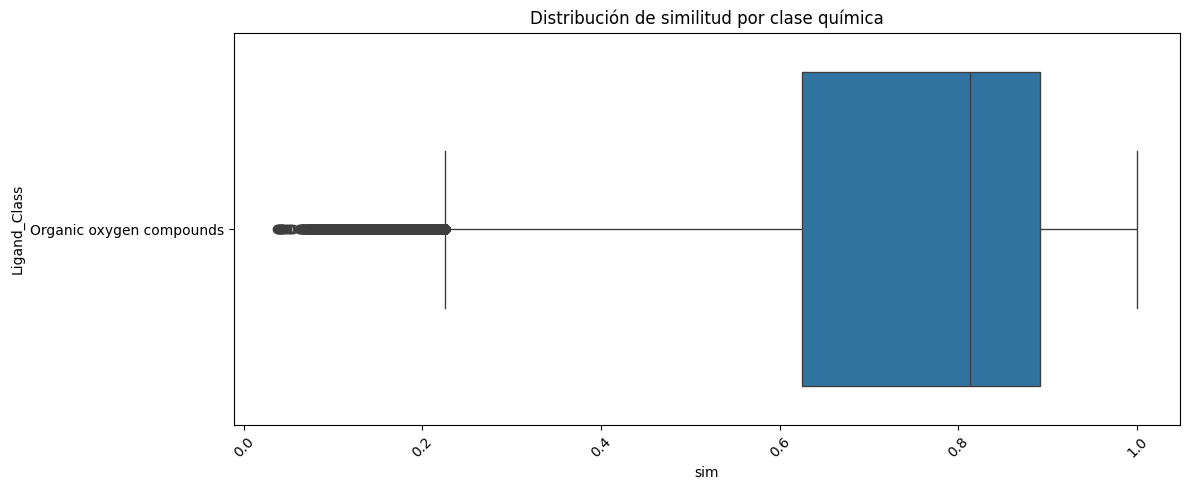

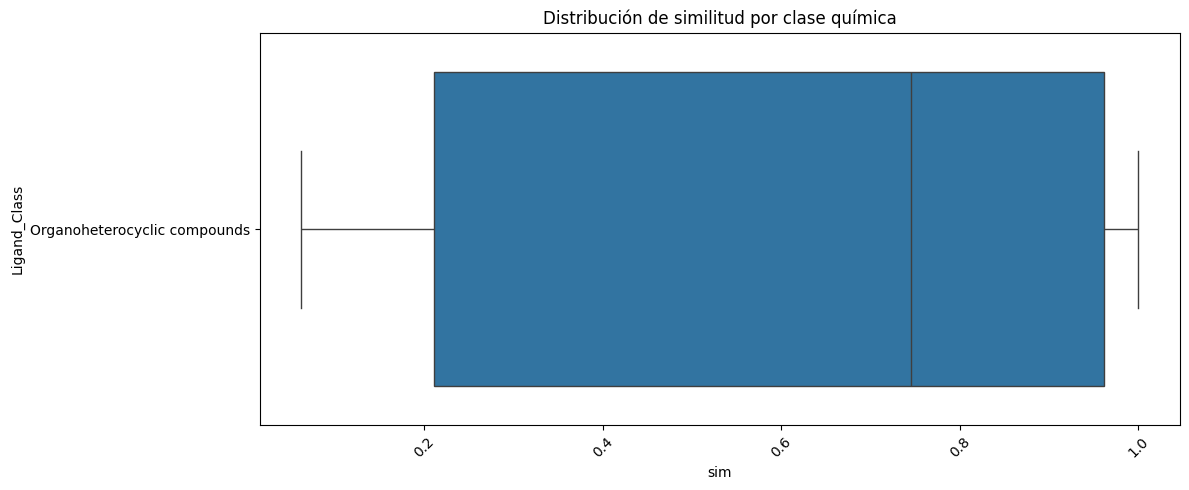

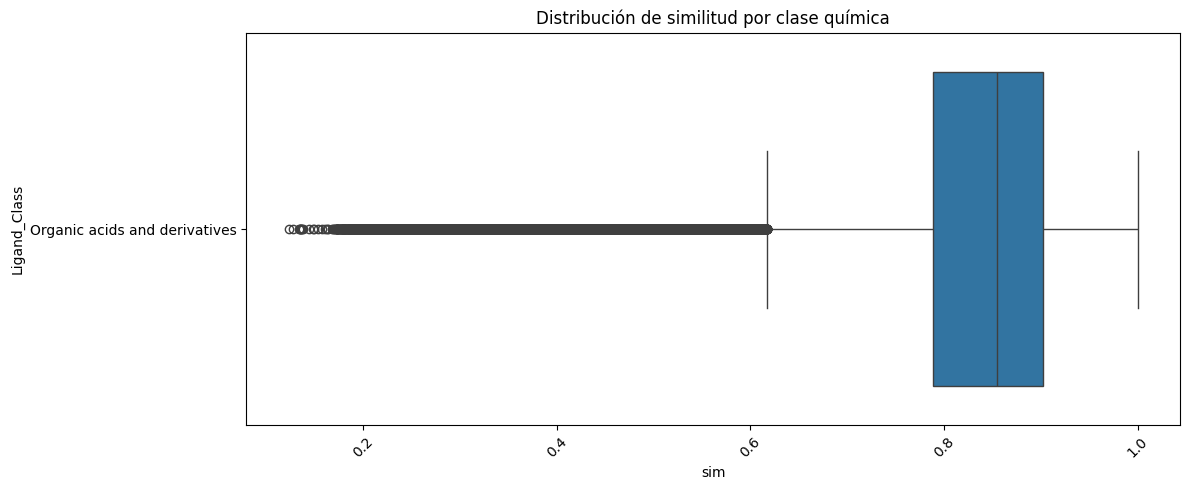

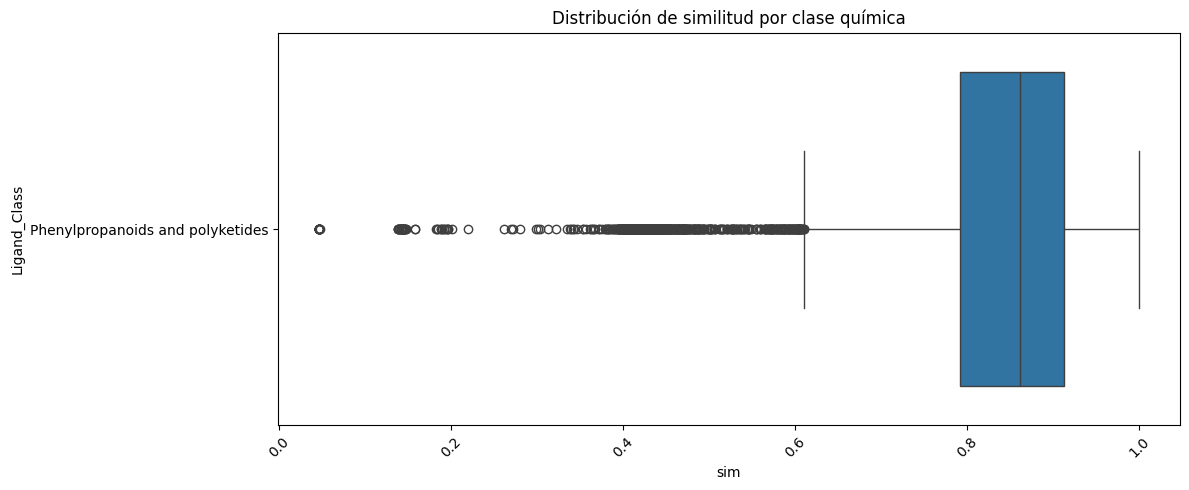

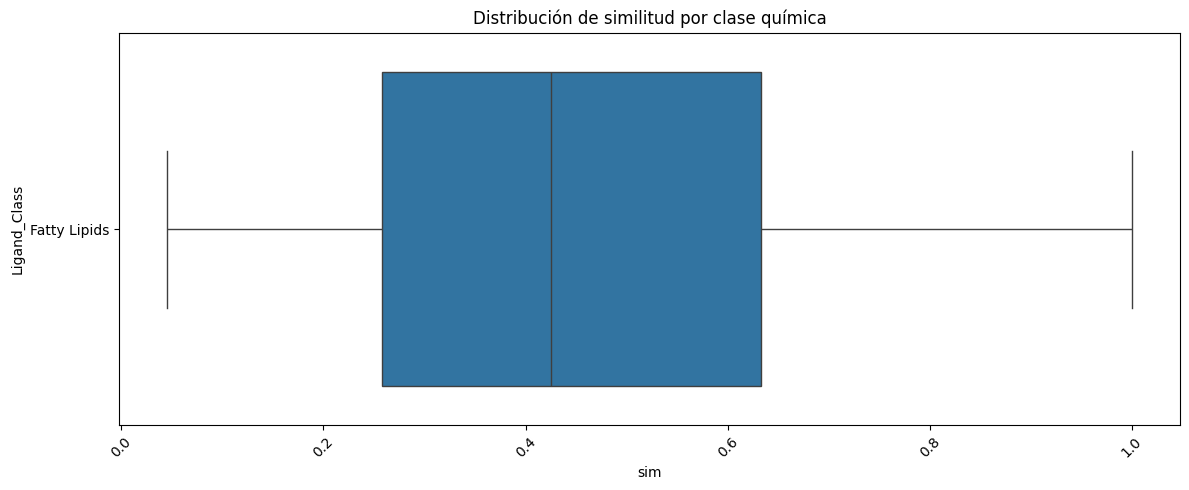

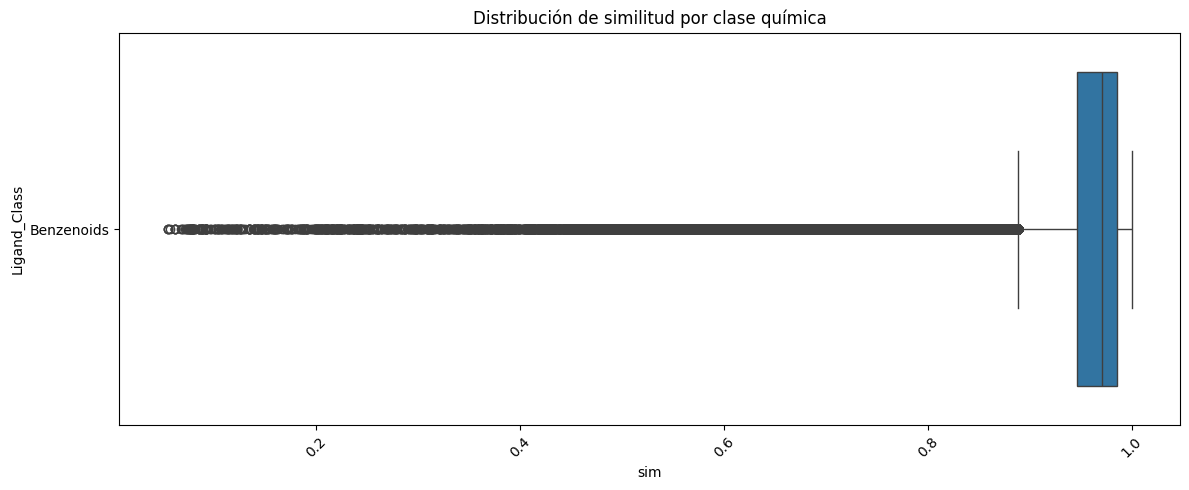

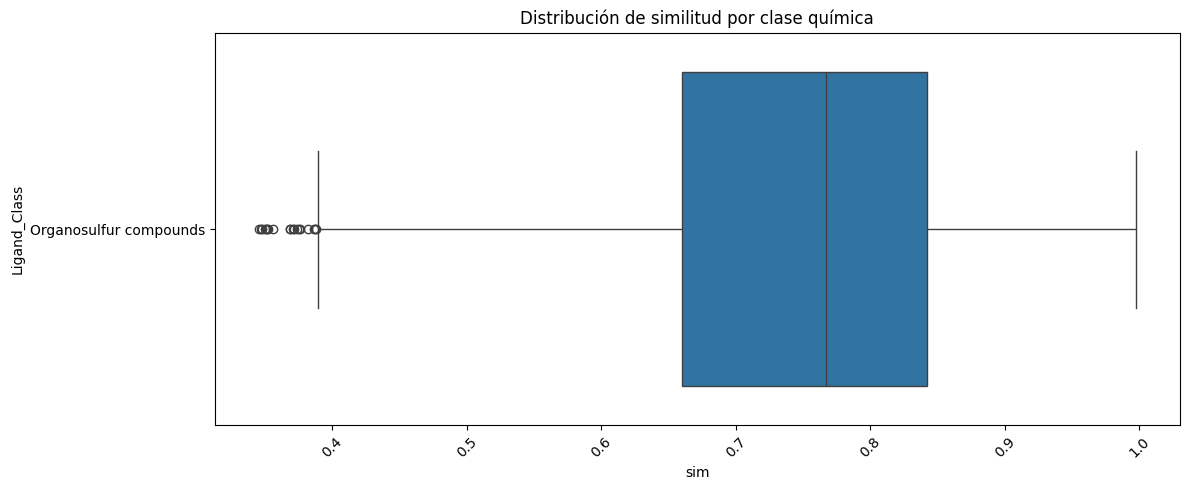

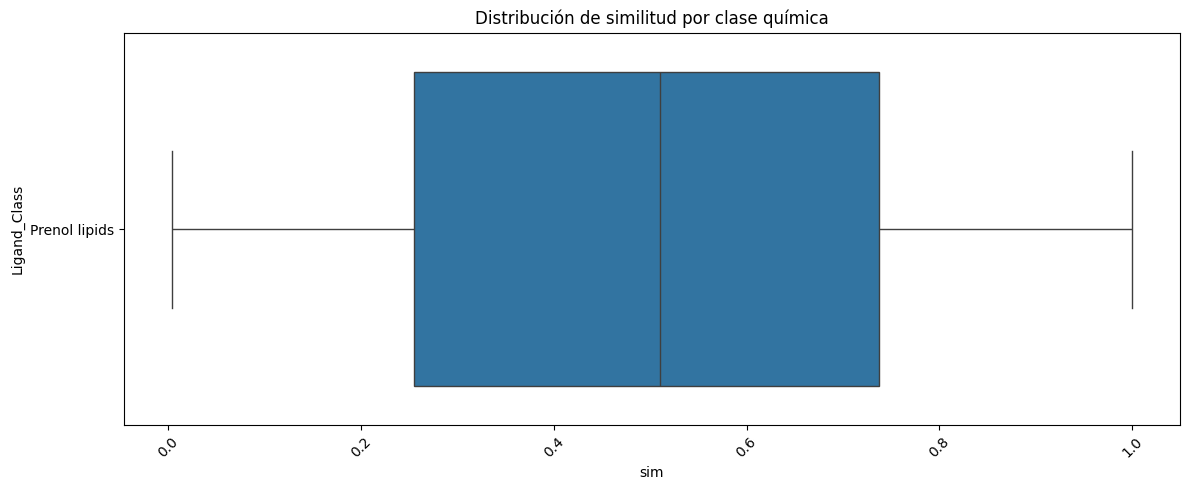

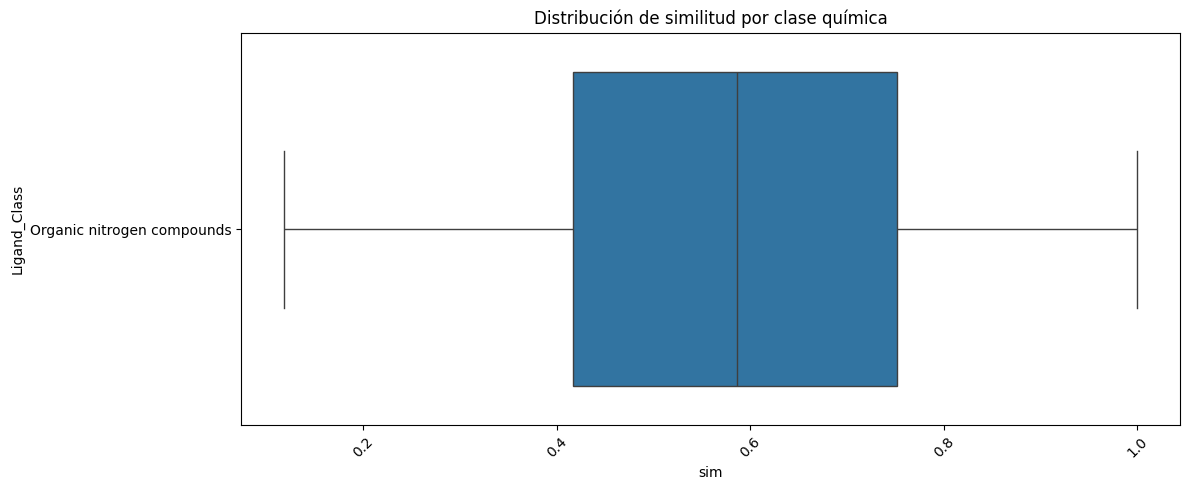

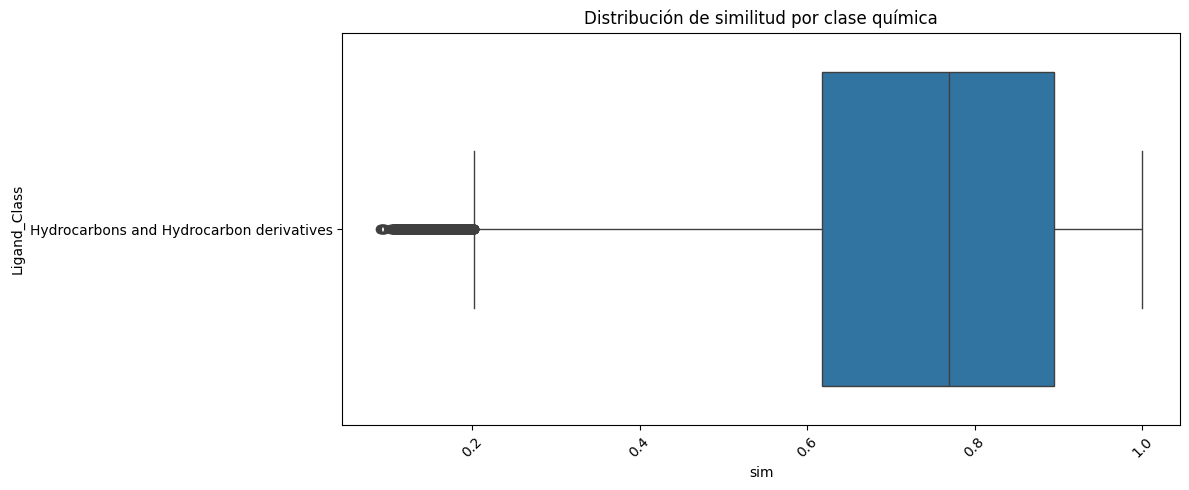

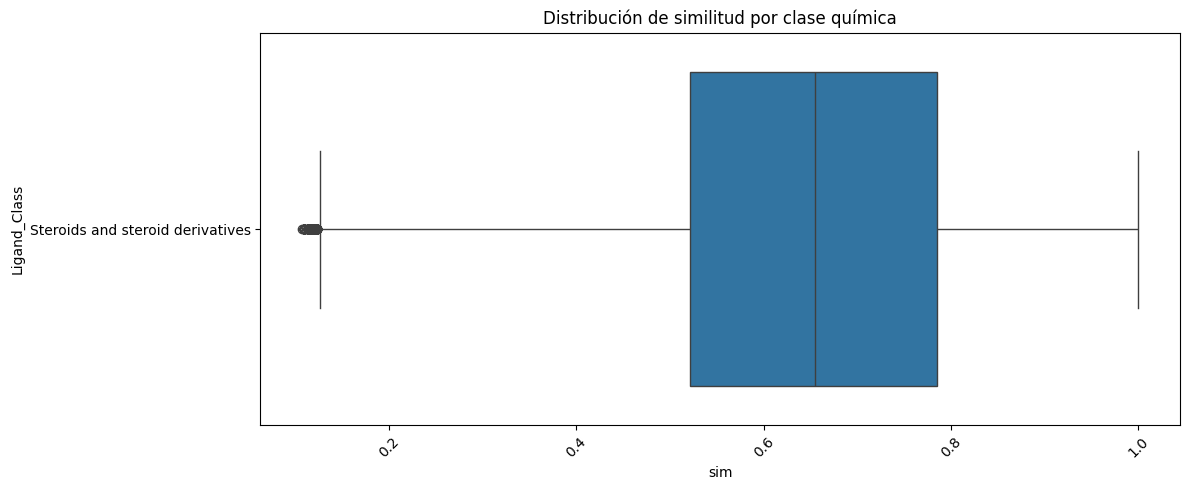

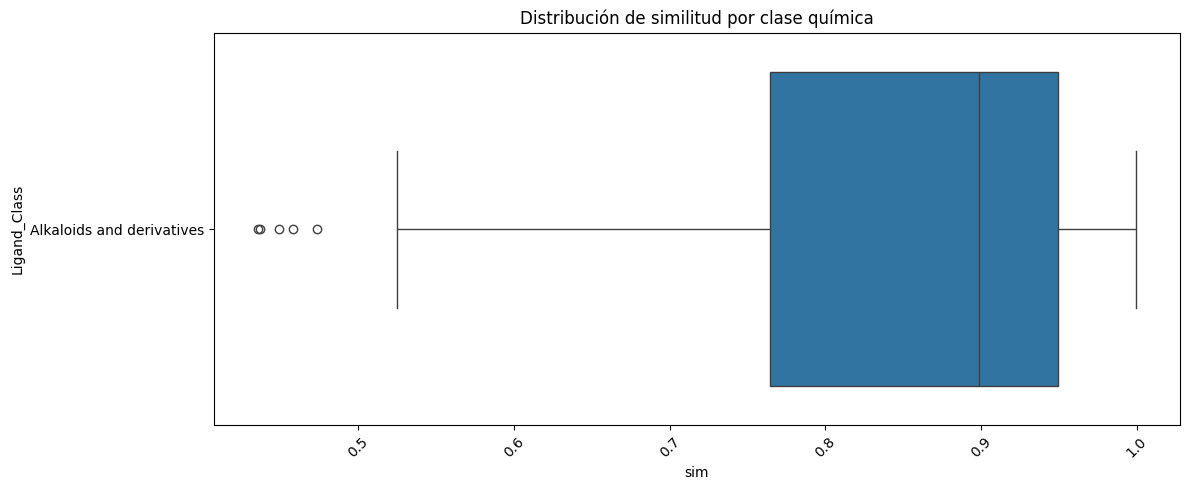

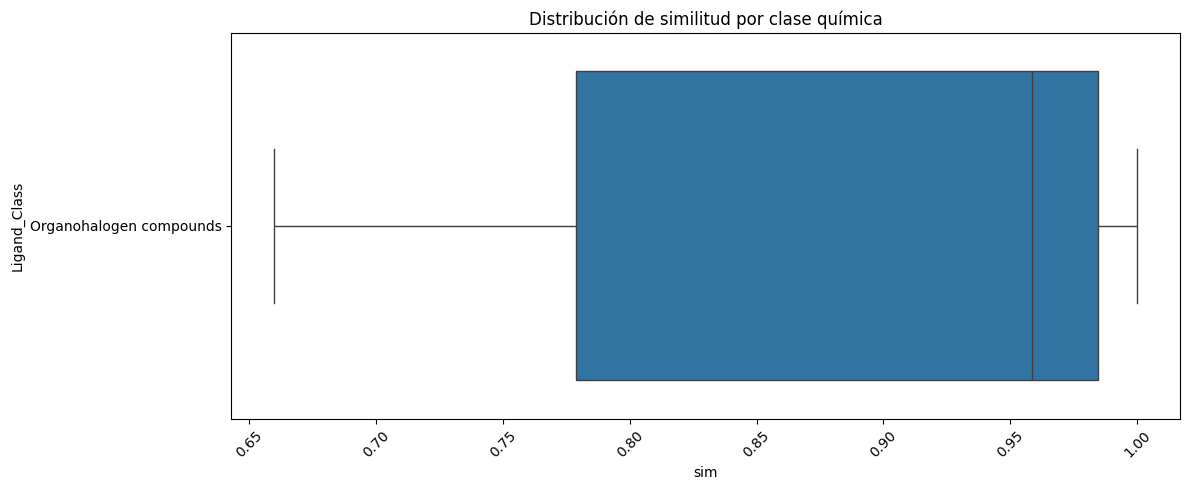

In [ ]:
#@title Boxplot flexibilidad ligandos por clases química

import seaborn as sns
import matplotlib.pyplot as plt

#clases = df_unido['Ligand_Class'].unique()

for clase in clases:
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df_unido[df_unido['Ligand_Class']== clase], x="sim", y="Ligand_Class")
    plt.xticks(rotation=45)
    plt.title(f"Distribución de similitud por clase química")
    plt.tight_layout()
    plt.show()
    plt.close()

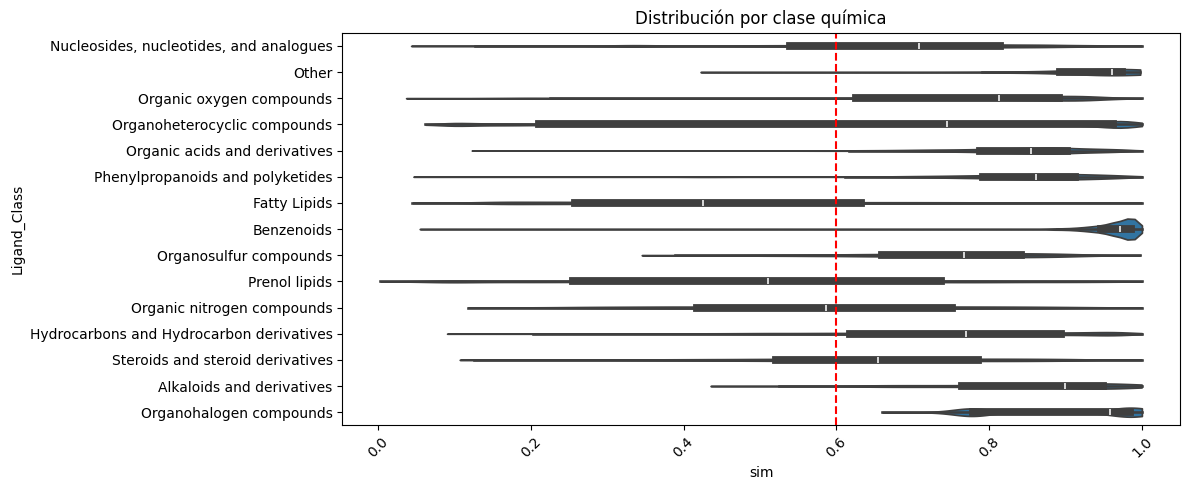

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.violinplot(data=df_unido, x="sim", y="Ligand_Class", cut=0)
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=1.5)
plt.xticks(rotation=45)
plt.title(f"Distribución por clase química")
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
from scipy.stats import kruskal

# Agrupa por clase
grupos = [grupo["sim"].values for _, grupo in df_unido.groupby("Ligand_Class")]
stat, p = kruskal(*grupos)
print(f"Kruskal-Wallis H = {stat:.3f}, p = {p:.3e}")


Kruskal-Wallis H = 1764100.799, p = 0.000e+00


In [ ]:
from scipy.stats import mannwhitneyu
from itertools import combinations

for clase1, clase2 in combinations(df_unido['Ligand_Class'].unique(), 2):
    grupo1 = df_unido[df_unido['Ligand_Class'] == clase1]['sim']
    grupo2 = df_unido[df_unido['Ligand_Class'] == clase2]['sim']
    stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')
    print(f"{clase1} vs {clase2} → p = {p:.3e}")


Nucleosides, nucleotides, and analogues vs Other → p = 4.357e-53
Nucleosides, nucleotides, and analogues vs Organic oxygen compounds → p = 0.000e+00
Nucleosides, nucleotides, and analogues vs Organoheterocyclic compounds → p = 0.000e+00
Nucleosides, nucleotides, and analogues vs Organic acids and derivatives → p = 0.000e+00
Nucleosides, nucleotides, and analogues vs Phenylpropanoids and polyketides → p = 0.000e+00
Nucleosides, nucleotides, and analogues vs Fatty Lipids → p = 0.000e+00
Nucleosides, nucleotides, and analogues vs Benzenoids → p = 0.000e+00
Nucleosides, nucleotides, and analogues vs Organosulfur compounds → p = 0.000e+00
Nucleosides, nucleotides, and analogues vs Prenol lipids → p = 0.000e+00
Nucleosides, nucleotides, and analogues vs Organic nitrogen compounds → p = 0.000e+00
Nucleosides, nucleotides, and analogues vs Hydrocarbons and Hydrocarbon derivatives → p = 0.000e+00
Nucleosides, nucleotides, and analogues vs Steroids and steroid derivatives → p = 0.000e+00


<ipython-input-23-1dcbb91ec2a8>:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')


Nucleosides, nucleotides, and analogues vs nan → p = nan
Nucleosides, nucleotides, and analogues vs Alkaloids and derivatives → p = 3.445e-110
Nucleosides, nucleotides, and analogues vs Organohalogen compounds → p = 0.000e+00
Other vs Organic oxygen compounds → p = 1.034e-38
Other vs Organoheterocyclic compounds → p = 5.967e-18
Other vs Organic acids and derivatives → p = 1.610e-25
Other vs Phenylpropanoids and polyketides → p = 8.996e-23
Other vs Fatty Lipids → p = 3.492e-77
Other vs Benzenoids → p = 3.857e-10
Other vs Organosulfur compounds → p = 1.778e-44
Other vs Prenol lipids → p = 2.104e-65
Other vs Organic nitrogen compounds → p = 5.736e-65
Other vs Hydrocarbons and Hydrocarbon derivatives → p = 1.618e-32
Other vs Steroids and steroid derivatives → p = 5.497e-58
Other vs nan → p = nan
Other vs Alkaloids and derivatives → p = 2.095e-08
Other vs Organohalogen compounds → p = 9.386e-02
Organic oxygen compounds vs Organoheterocyclic compounds → p = 2.715e-04
Organic oxygen compounds

KeyboardInterrupt: 

## Cálculos de CLES (common language effect size)

Cálculo para identificar los pares de distribuciones más extremamente separadas.

La idea de esto es que si la distribución “big” tiende a ser major que la “sma”, entonces te saldrá un valor > 0.5; si por el contrario “big” tiende a ser menor que “sma”, entonces te saldrá un valor < 0.5.

Es una forma de decir si una distribución está desplazada hacia valores más altos que otra.

In [ ]:
#@title Función Cálculo del CLES

import scipy.stats as st

def cles(big, sma):

    return st.mannwhitneyu(big, sma).statistic/(len(big)*len(sma))

In [ ]:
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations

# Define la función CLES
def cles(big, sma):
    return mannwhitneyu(big, sma).statistic / (len(big) * len(sma))

# Test global Kruskal-Wallis
grupos = [grupo["sim"].values for _, grupo in df_unido.groupby("Ligand_Class")]
stat, p = kruskal(*grupos)
print(f"Kruskal-Wallis H = {stat:.3f}, p = {p:.3e}")

# Comparaciones por pares con Mann-Whitney U y CLES
resultados = []

for clase1, clase2 in combinations(df_unido['Ligand_Class'].unique(), 2):
    grupo1 = df_unido[df_unido['Ligand_Class'] == clase1]['sim']
    grupo2 = df_unido[df_unido['Ligand_Class'] == clase2]['sim']

    stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')
    efecto = cles(grupo1, grupo2)

    print(f"{clase1} vs {clase2} → p = {p:.3e}, CLES = {efecto:.3f}")

    resultados.append({
        "clase1": clase1,
        "clase2": clase2,
        "p_value": p,
        "cles": efecto
    })


Kruskal-Wallis H = 1764100.799, p = 0.000e+00
Nucleosides, nucleotides, and analogues vs Other → p = 4.357e-53, CLES = 0.128
Nucleosides, nucleotides, and analogues vs Organic oxygen compounds → p = 0.000e+00, CLES = 0.378
Nucleosides, nucleotides, and analogues vs Organoheterocyclic compounds → p = 0.000e+00, CLES = 0.479
Nucleosides, nucleotides, and analogues vs Organic acids and derivatives → p = 0.000e+00, CLES = 0.218
Nucleosides, nucleotides, and analogues vs Phenylpropanoids and polyketides → p = 0.000e+00, CLES = 0.212
Nucleosides, nucleotides, and analogues vs Fatty Lipids → p = 0.000e+00, CLES = 0.766
Nucleosides, nucleotides, and analogues vs Benzenoids → p = 0.000e+00, CLES = 0.034
Nucleosides, nucleotides, and analogues vs Organosulfur compounds → p = 0.000e+00, CLES = 0.390
Nucleosides, nucleotides, and analogues vs Prenol lipids → p = 0.000e+00, CLES = 0.679
Nucleosides, nucleotides, and analogues vs Organic nitrogen compounds → p = 0.000e+00, CLES = 0.622
Nucleosides, 

<ipython-input-24-b4daa2b604aa>:20: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')
<ipython-input-24-b4daa2b604aa>:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return mannwhitneyu(big, sma).statistic / (len(big) * len(sma))


Nucleosides, nucleotides, and analogues vs nan → p = nan, CLES = nan
Nucleosides, nucleotides, and analogues vs Alkaloids and derivatives → p = 3.445e-110, CLES = 0.202
Nucleosides, nucleotides, and analogues vs Organohalogen compounds → p = 0.000e+00, CLES = 0.150
Other vs Organic oxygen compounds → p = 1.034e-38, CLES = 0.815
Other vs Organoheterocyclic compounds → p = 5.967e-18, CLES = 0.709
Other vs Organic acids and derivatives → p = 1.610e-25, CLES = 0.753
Other vs Phenylpropanoids and polyketides → p = 8.996e-23, CLES = 0.739
Other vs Fatty Lipids → p = 3.492e-77, CLES = 0.951
Other vs Benzenoids → p = 3.857e-10, CLES = 0.348
Other vs Organosulfur compounds → p = 1.778e-44, CLES = 0.841
Other vs Prenol lipids → p = 2.104e-65, CLES = 0.914
Other vs Organic nitrogen compounds → p = 5.736e-65, CLES = 0.912
Other vs Hydrocarbons and Hydrocarbon derivatives → p = 1.618e-32, CLES = 0.788
Other vs Steroids and steroid derivatives → p = 5.497e-58, CLES = 0.889
Other vs nan → p = nan, CL

In [ ]:
df_resultados = pd.DataFrame(resultados)
df_resultados_sorted = df_resultados.sort_values(by="cles", ascending=False)

In [ ]:
df_resultados_sorted.head(20)

clase1  \
86                        Benzenoids   
88                        Benzenoids   
85                        Benzenoids   
84                        Benzenoids   
19                             Other   
55     Organic acids and derivatives   
65  Phenylpropanoids and polyketides   
22                             Other   
23                             Other   
87                        Benzenoids   
25                             Other   
69  Phenylpropanoids and polyketides   
59     Organic acids and derivatives   
68  Phenylpropanoids and polyketides   
58     Organic acids and derivatives   
21                             Other   
71  Phenylpropanoids and polyketides   
61     Organic acids and derivatives   
15                             Other   
32          Organic oxygen compounds   

                                      clase2       p_value      cles  
86                Organic nitrogen compounds  0.000000e+00  0.979061  
88          Steroids and steroid derivatives  0.000000e+00  0.973118  
85                             Prenol lipids  0.000000e+00  0.970906  
84                    Organosulfur compounds  0.000000e+00  0.961425  
19                              Fatty Lipids  3.491774e-77  0.950502  
55                              Fatty Lipids  0.000000e+00  0.930522  
65                              Fatty Lipids  0.000000e+00  0.927993  
22                             Prenol lipids  2.103585e-65  0.914200  
23                Organic nitrogen compounds  5.736435e-65  0.912381  
87  Hydrocarbons and Hydrocarbon derivatives  0.000000e+00  0.900896  
25          Steroids and steroid derivatives  5.497073e-58  0.888911  
69                Organic nitrogen compounds  0.000000e+00  0.862914  
59                Organic nitrogen compounds  0.000000e+00  0.862605  
68                             Prenol lipids  0.000000e+00  0.861287  
58                             Prenol lipids  0.000000e+00  0.860229  
21                    Organosulfur compounds  1.778306e-44  0.840557  
71          Steroids and steroid derivatives  0.000000e+00  0.826674  
61          Steroids and steroid derivatives  0.000000e+00  0.825279  
15                  Organic oxygen compounds  1.034092e-38  0.815269  
32                              Fatty Lipids  0.000000e+00  0.802814

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una lista con todas las clases
clases = sorted(df_unido['Ligand_Class'].dropna().unique())


# Crear matriz vacía con NaNs
cles_matrix = pd.DataFrame(np.nan, index=clases, columns=clases)

# Rellenar la matriz con CLES
for res in resultados:
    c1, c2 = res["clase1"], res["clase2"]
    cles_val = res["cles"]
    cles_matrix.loc[c1, c2] = cles_val
    cles_matrix.loc[c2, c1] = 1 - cles_val  # Simetría inversa


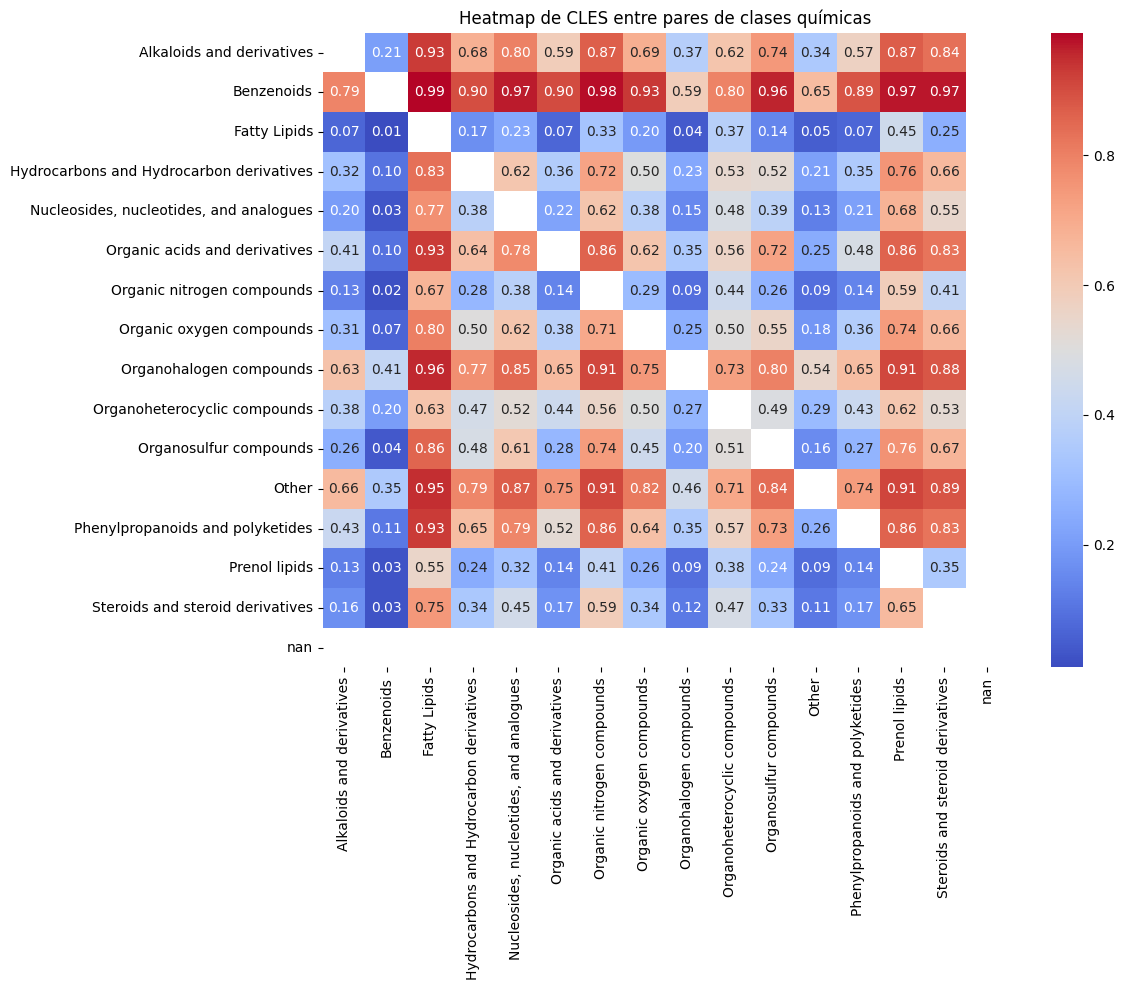

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(cles_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0.5)
plt.title("Heatmap de CLES entre pares de clases químicas")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Análisis de variabilidad de sitios de unión vs clase química

para cada ligando, extraer de la matriz de autosimilitudes de USRRs de los correspondientes sitios de unión los valores por encima de la diagonal. Juntar todos los valores de los ligandos de cada clase química, y representar, para cada una de ellas, la distribución en forma de violín plot o box plot. Hacer los correspondientes test estadísticos.

Igual también es interesante representar adicionalmente autosimlitudes de USRRs de ligandos vs las de los correspondientes sitios de unión mediante un diagrama de dispersión: debería haber buena correlación.

In [ ]:
#@title Identificar conformaciones

import os
import pandas as pd

pair_dict = {}

carpeta_csv = "/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/USR_sitios_de_union/Similarity_Matrices"

for archivo in os.listdir(carpeta_csv):
    if not archivo.endswith(".csv"):
        continue

    df = pd.read_csv(os.path.join(carpeta_csv, archivo))

    if 'conformation' in df.columns:
        df.index = df['conformation']
        df = df.drop(columns=['conformation'])

    df.index = (df.index
                .str.replace('_sitio.pdb', '', regex=False)
                .str.strip())
    df.columns = (df.columns
                  .str.replace('_sitio.pdb', '', regex=False)
                  .str.strip())

    names = df.index.tolist()

    for i in range(len(names)):
          for j in range(i+1, len(names)):
            sitio1, sitio2 = names[i], names[j]
            sim = df.iat[i, j]

            key = (sitio1, sitio2)
            pair_dict[key] = sim


# Convertir el dictionario a DataFrame
df_pairs = pd.DataFrame([
    {'sitio1': k[0], 'sitio2': k[1], 'sim': v}
    for k, v in pair_dict.items()
])

# Filtrar misma conformación y diferente conformación
df_mayor_06 = df_pairs[df_pairs['sim'] > 0.6].reset_index(drop=True)
df_menor_06 = df_pairs[df_pairs['sim'] <=  0.6].reset_index(drop=True)

print(f"Parejas únicas ≥0.6: {len(df_mayor_06)}")
print(f"Parejas únicas <0.6: {len(df_menor_06)}")

df_pairs.to_csv("/content/drive/MyDrive/TFM/T3/Archivos/df_parejas_ligandos_sim_sitios.csv", sep=',', index=False)
print(df_pairs.shape[0])

Parejas únicas ≥0.6: 1402210
Parejas únicas <0.6: 10874113
12276323


In [ ]:
df_pairs = pd.read_csv("/content/drive/MyDrive/TFM/T3/Archivos/df_parejas_ligandos_sim_sitios.csv", sep=',')

In [ ]:
df_pairs.head()

sitio1          sitio2       sim
0  3QTC_0A1_A_811  5YQ1_0A1_A_902  0.405743
1  3QTC_0A1_A_811  5YQB_0A1_A_902  0.402556
2  5YQ1_0A1_A_902  5YQB_0A1_A_902  0.976377
3  4BUQ_KGM_A_201  4BUQ_KGM_B_201  0.898308
4  4BUQ_KGM_A_201  4LOV_KGM_A_201  0.783410

In [ ]:
#@title Definir función extraer ligando

def find_ligand_instances_sitio(row: pd.Series) -> str:
  instance = row['sitio1']
  ligand = instance.split("_")[1]
  return ligand

In [ ]:
#@title Aplicar función al df similitudes

from pandarallel import pandarallel

pandarallel.initialize(nb_workers= 2, progress_bar= True)

df_pairs['Ligand_id'] = df_pairs.parallel_apply(find_ligand_instances_sitio, axis = 1)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
df_clase['Ligand_Class'].value_counts()

Ligand_Class
Organoheterocyclic compounds                783
Benzenoids                                  470
Organic acids and derivatives               381
Organic oxygen compounds                    327
Nucleosides, nucleotides, and analogues     252
Fatty Lipids                                191
Phenylpropanoids and polyketides            110
Organic nitrogen compounds                   82
Prenol lipids                                73
Steroids and steroid derivatives             61
Hydrocarbons and Hydrocarbon derivatives     17
Alkaloids and derivatives                    15
Organohalogen compounds                      10
Other                                         8
Organosulfur compounds                        7
Name: count, dtype: int64

In [ ]:
df_unido_sitio = df_pairs.merge(df_clase, on = "Ligand_id", how = "left")

In [ ]:
df_unido_sitio.head()

sitio1          sitio2       sim Ligand_id  \
0  3QTC_0A1_A_811  5YQ1_0A1_A_902  0.405743       0A1   
1  3QTC_0A1_A_811  5YQB_0A1_A_902  0.402556       0A1   
2  5YQ1_0A1_A_902  5YQB_0A1_A_902  0.976377       0A1   
3  4BUQ_KGM_A_201  4BUQ_KGM_B_201  0.898308       KGM   
4  4BUQ_KGM_A_201  4LOV_KGM_A_201  0.783410       KGM   

                    Ligand_Class  
0  Organic acids and derivatives  
1  Organic acids and derivatives  
2  Organic acids and derivatives  
3                   Fatty Lipids  
4                   Fatty Lipids

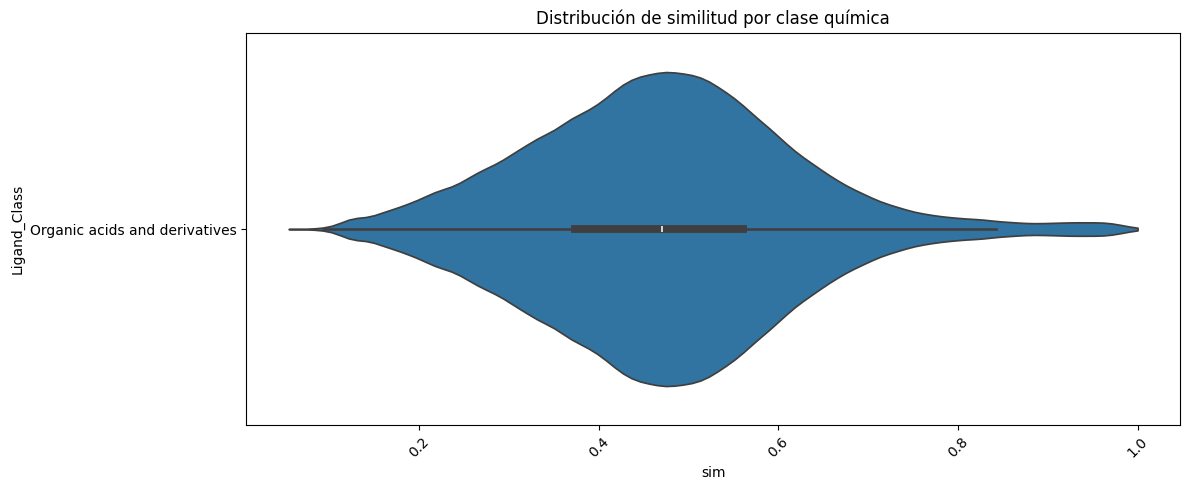

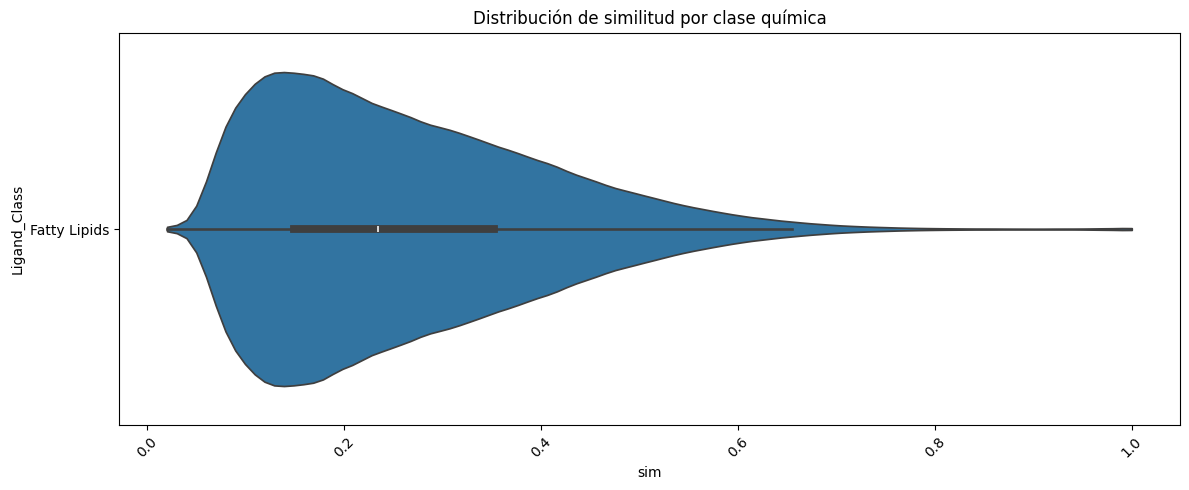

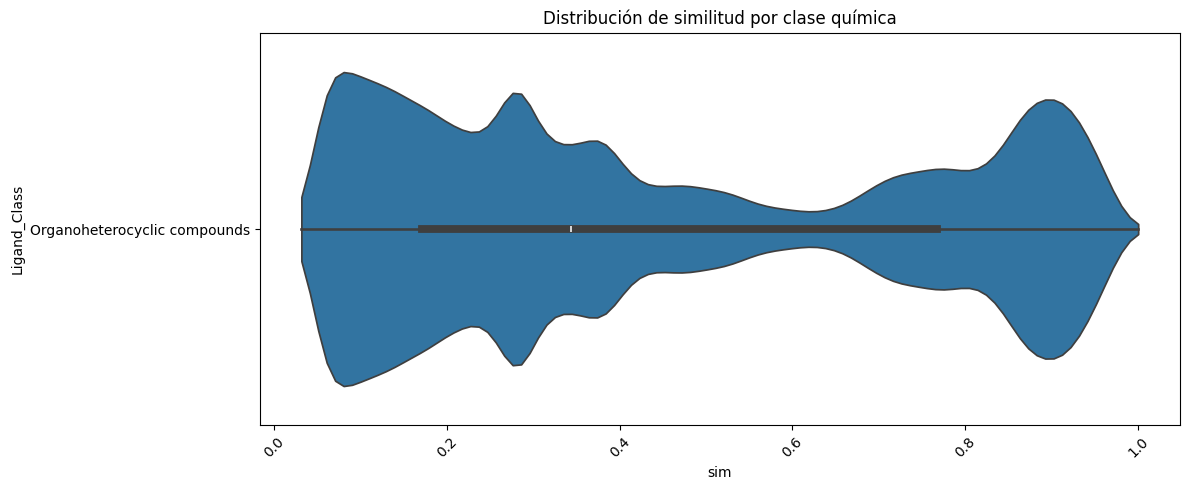

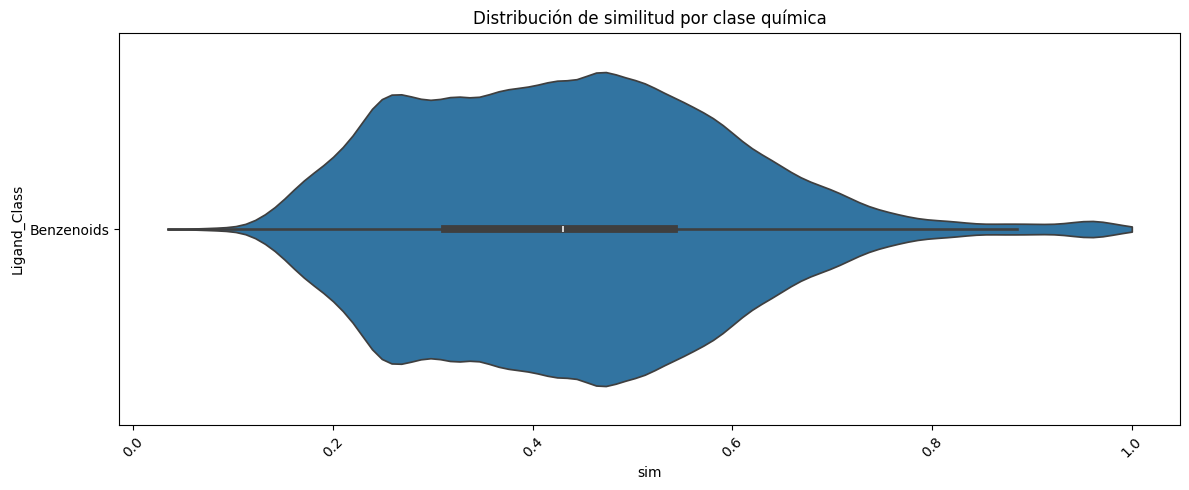

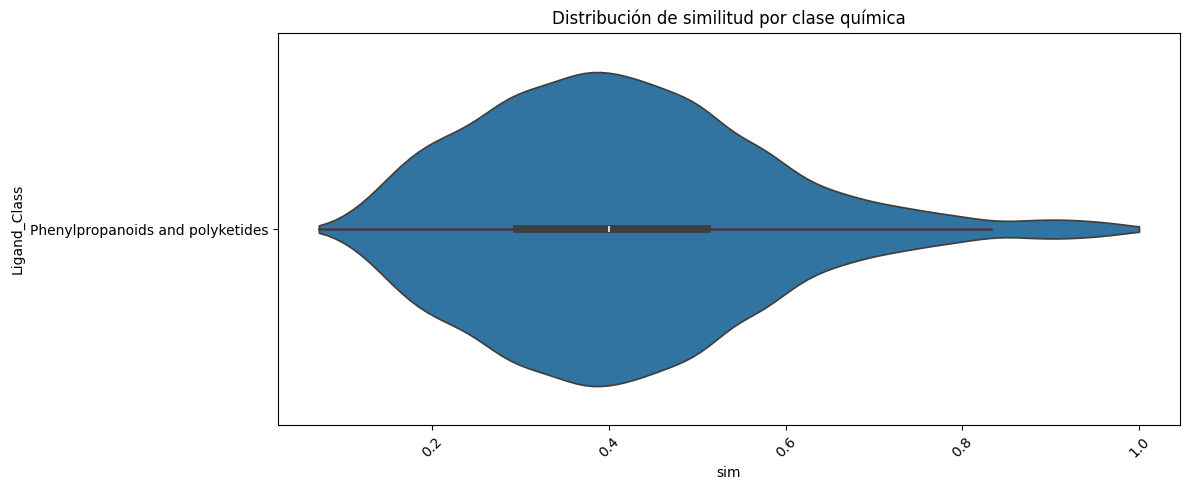

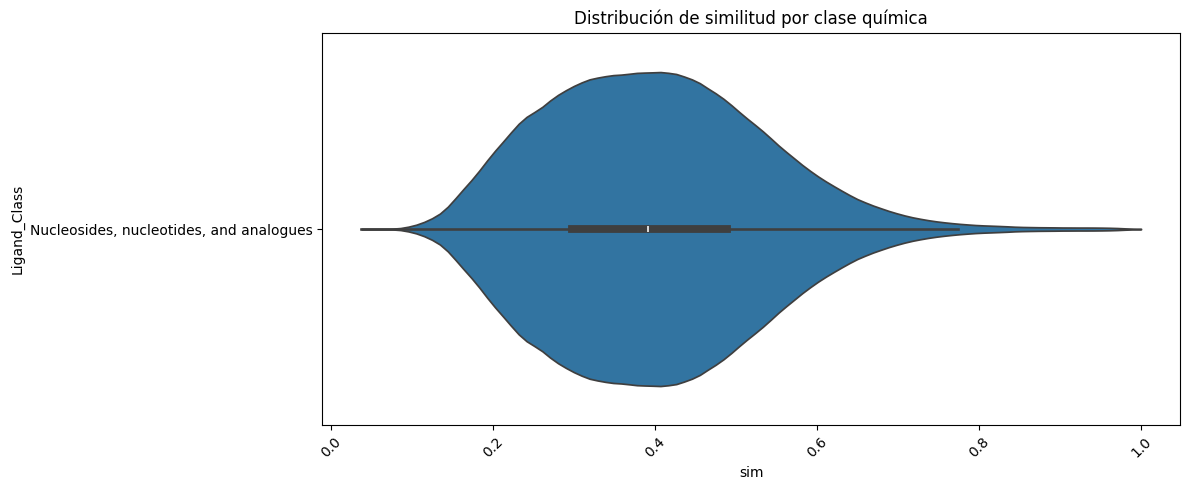

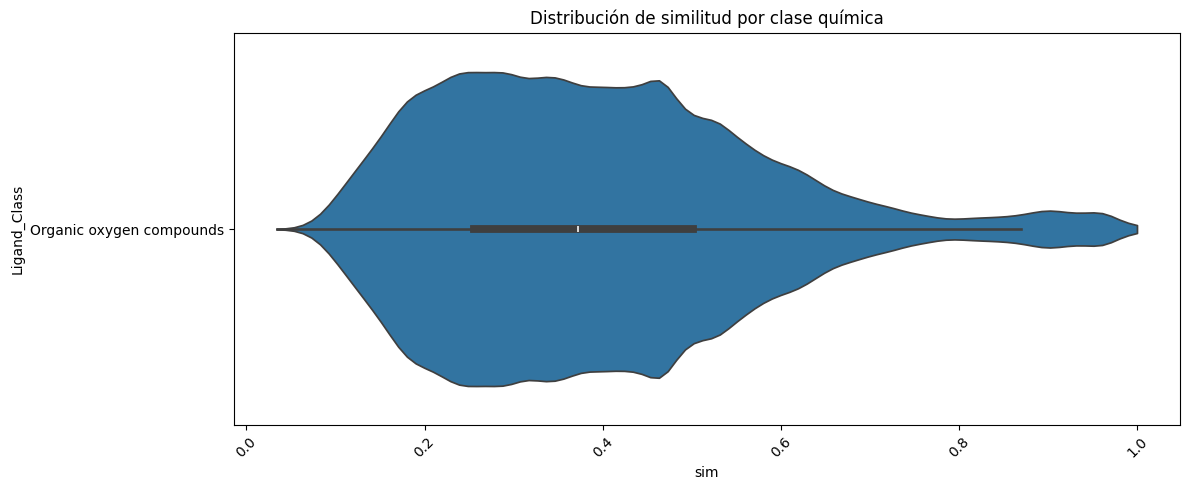

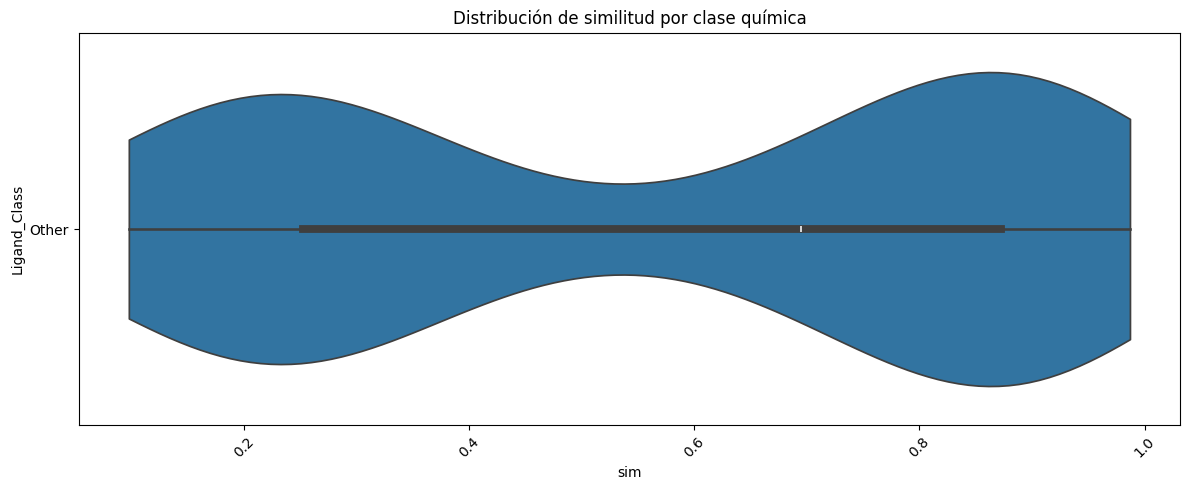

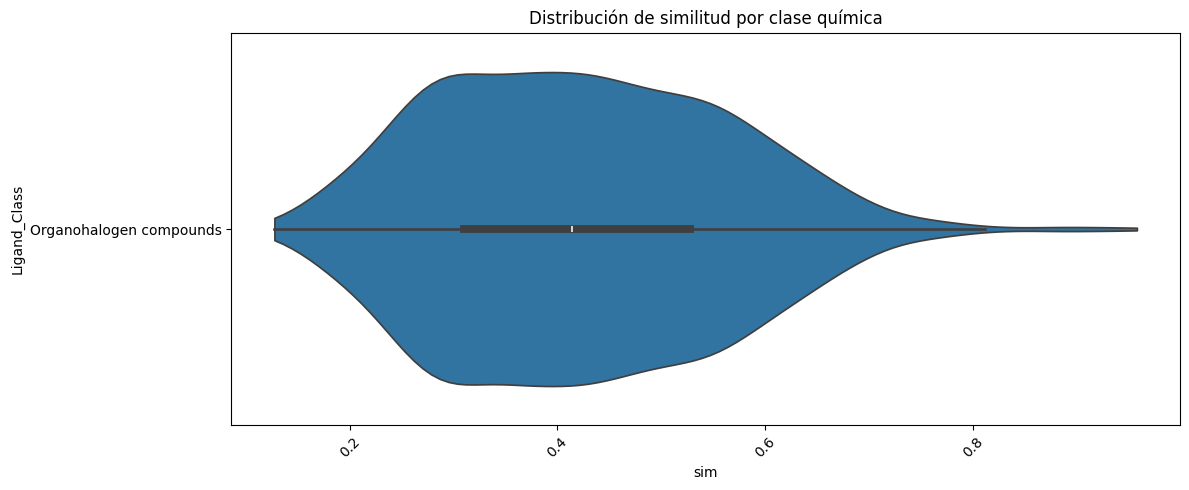

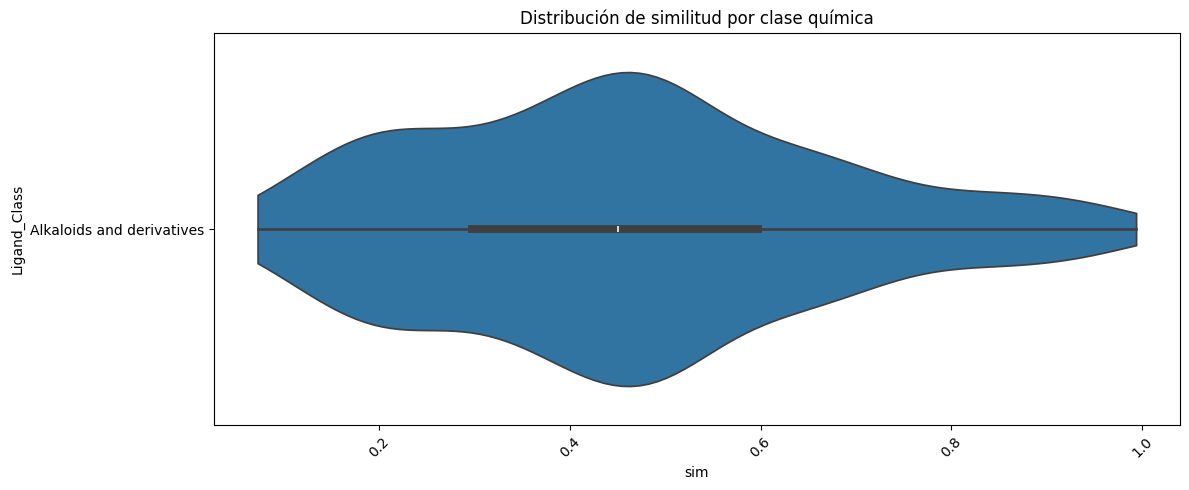

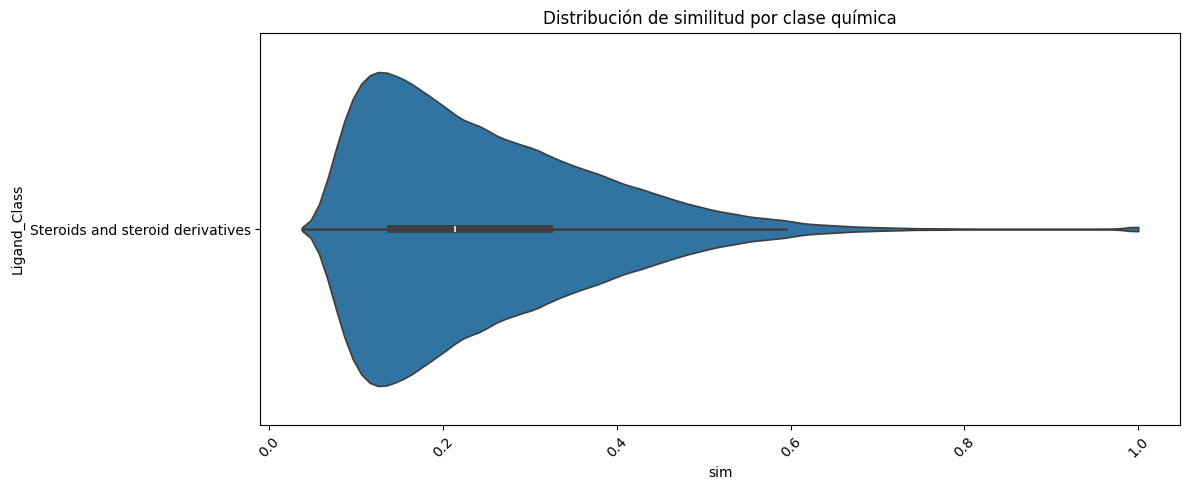

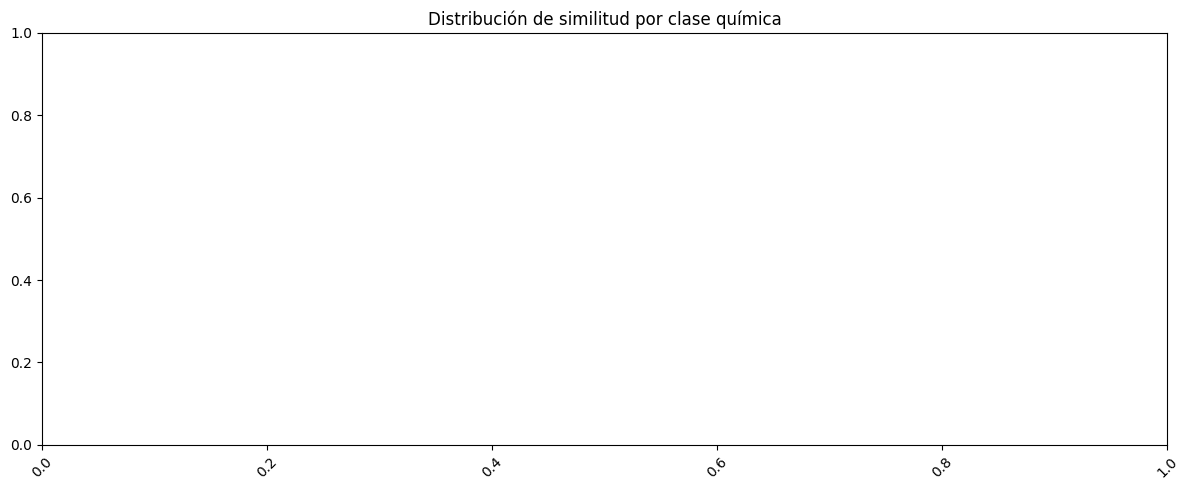

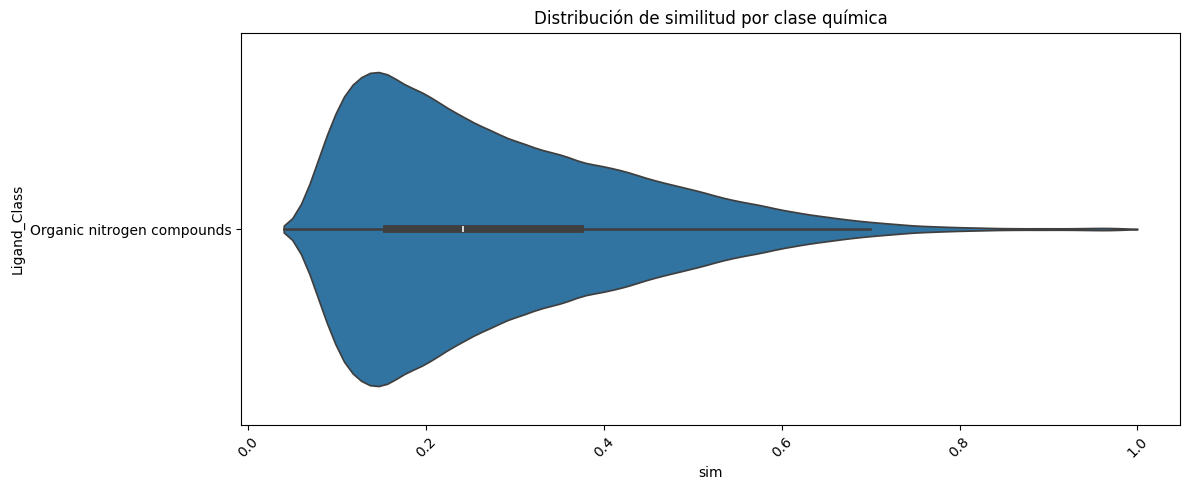

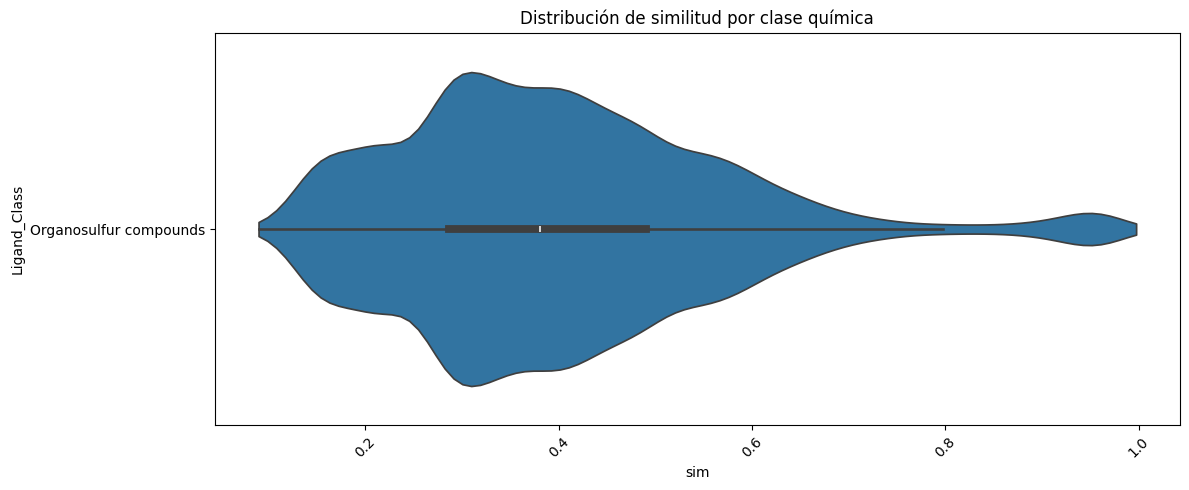

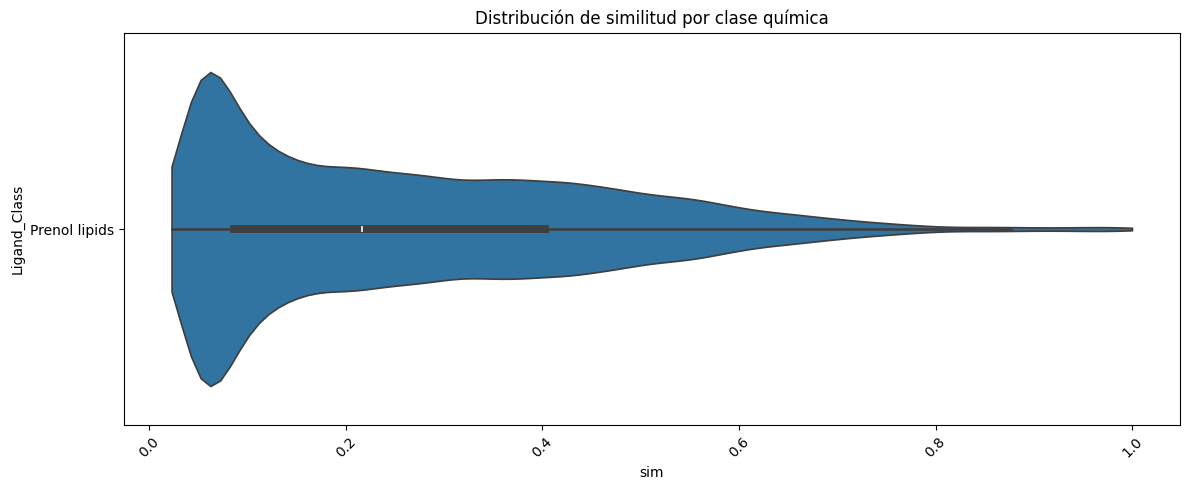

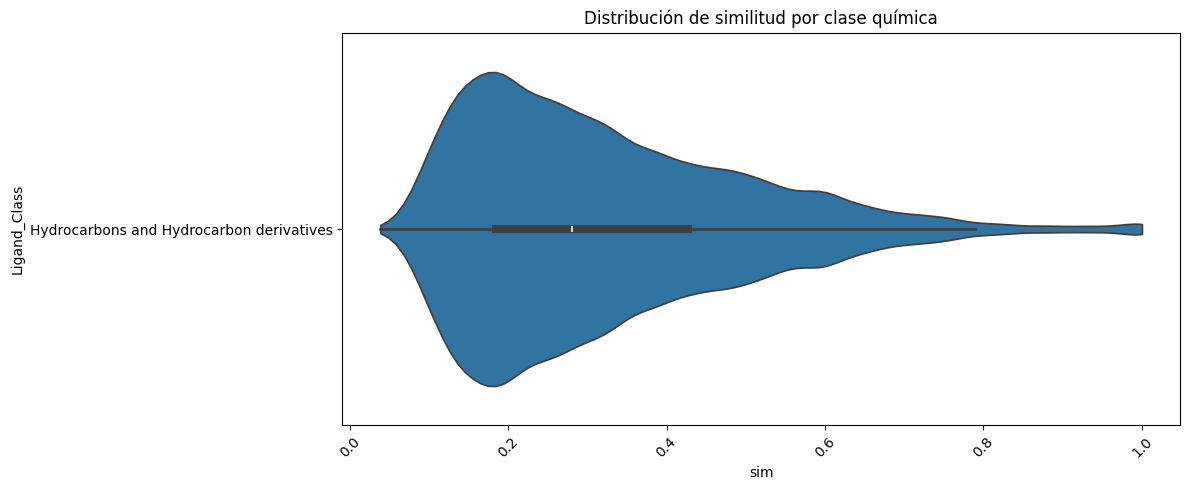

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

clases = df_unido_sitio['Ligand_Class'].unique()

for clase in clases:
    plt.figure(figsize=(12, 5))
    sns.violinplot(data=df_unido_sitio[df_unido_sitio['Ligand_Class']== clase], x="sim", y="Ligand_Class", cut=0)
    plt.xticks(rotation=45)
    plt.title(f"Distribución de similitud por clase química")
    plt.tight_layout()
    plt.show()
    plt.close()

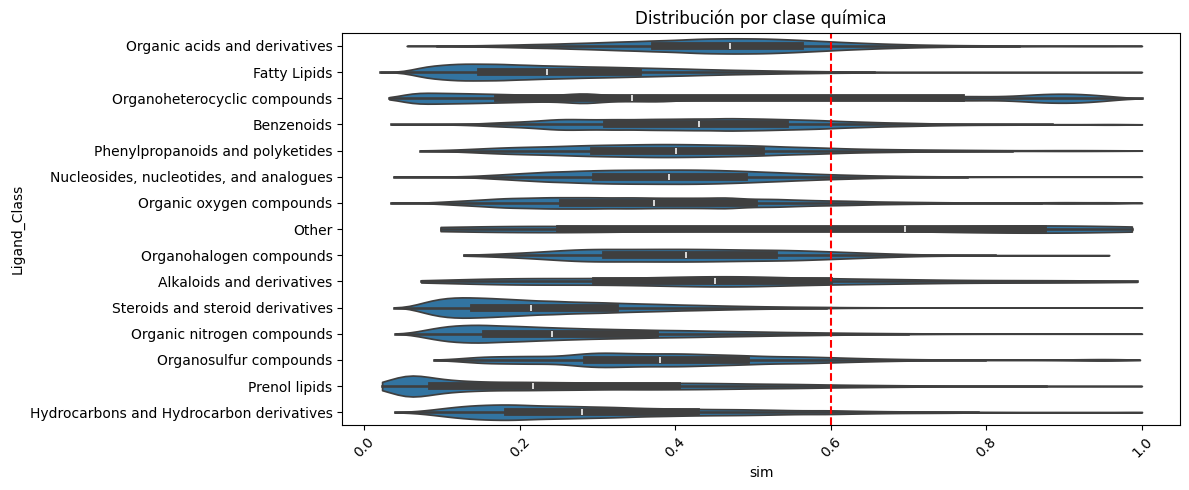

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.violinplot(data=df_unido_sitio, x="sim", y="Ligand_Class", cut=0)
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=1.5)
plt.xticks(rotation=45)
plt.title(f"Distribución por clase química")
plt.tight_layout()
plt.show()
plt.close()

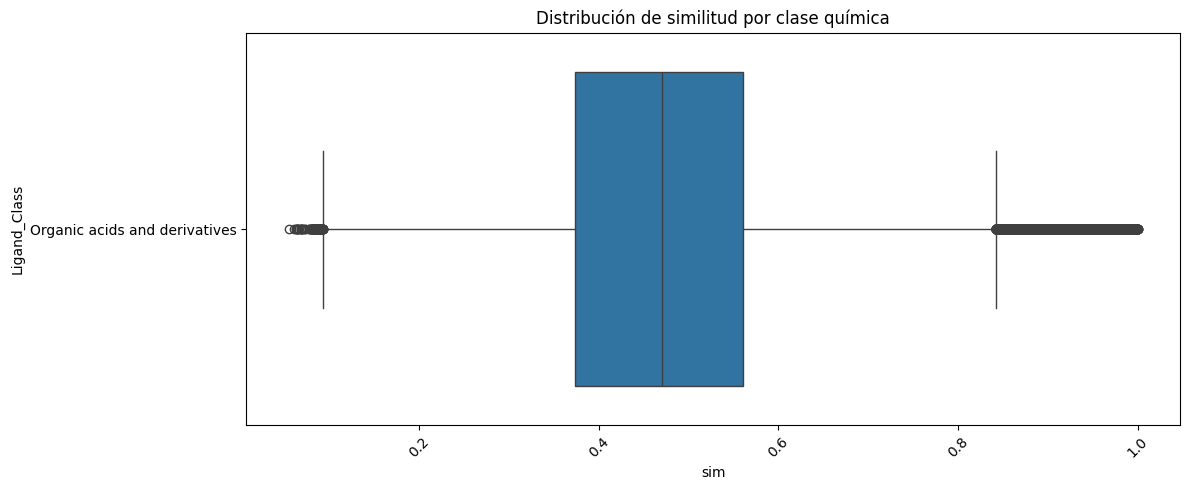

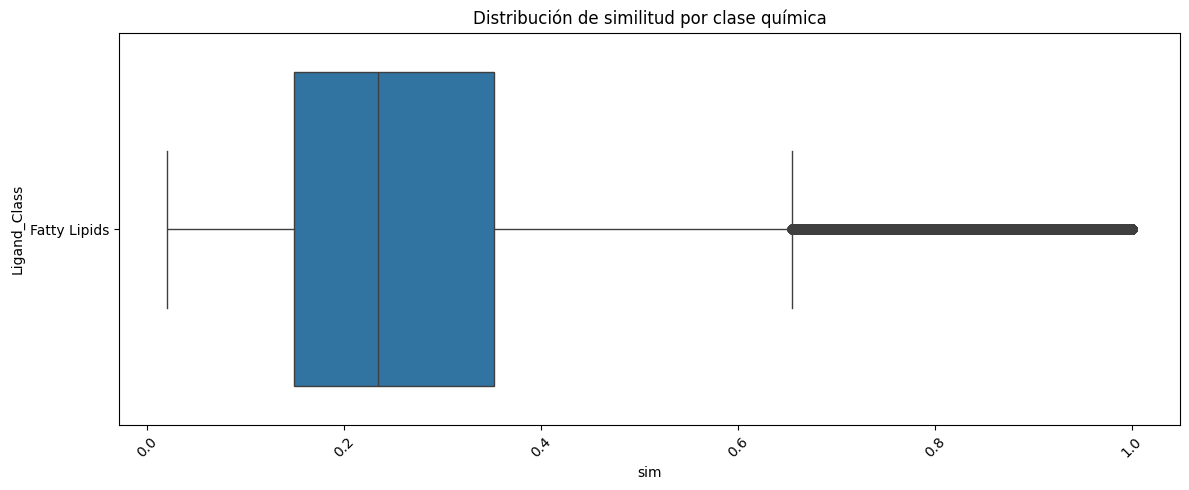

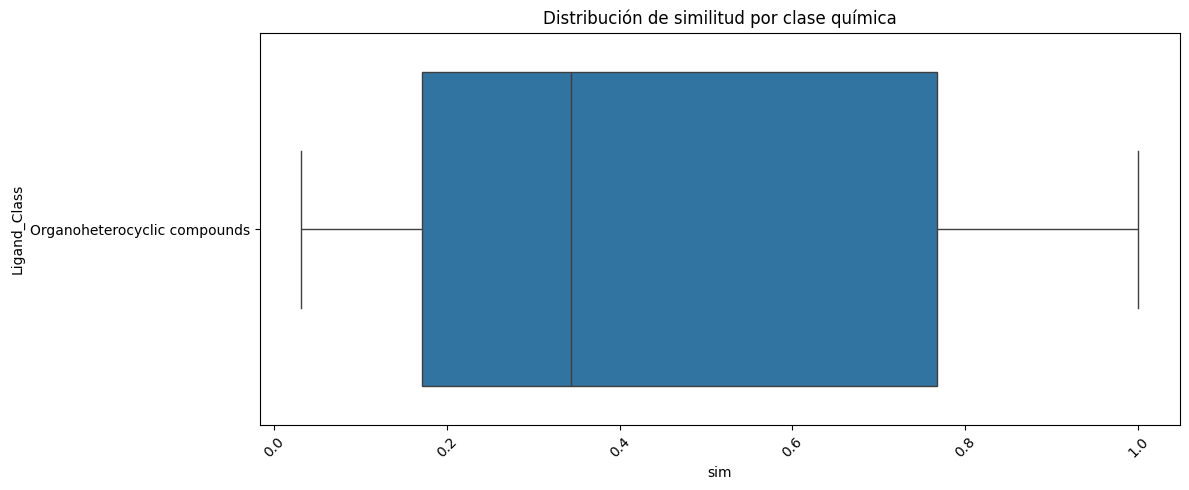

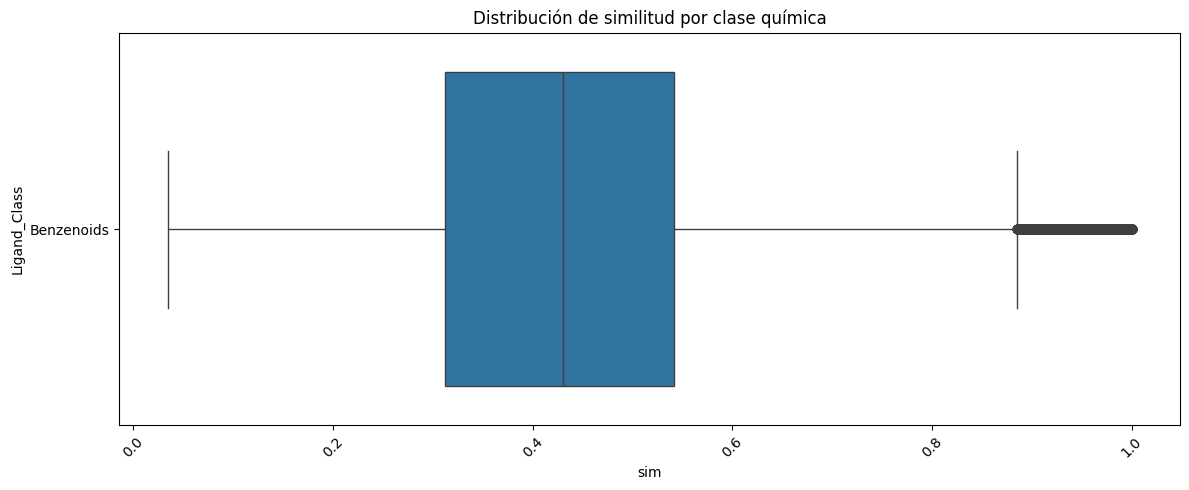

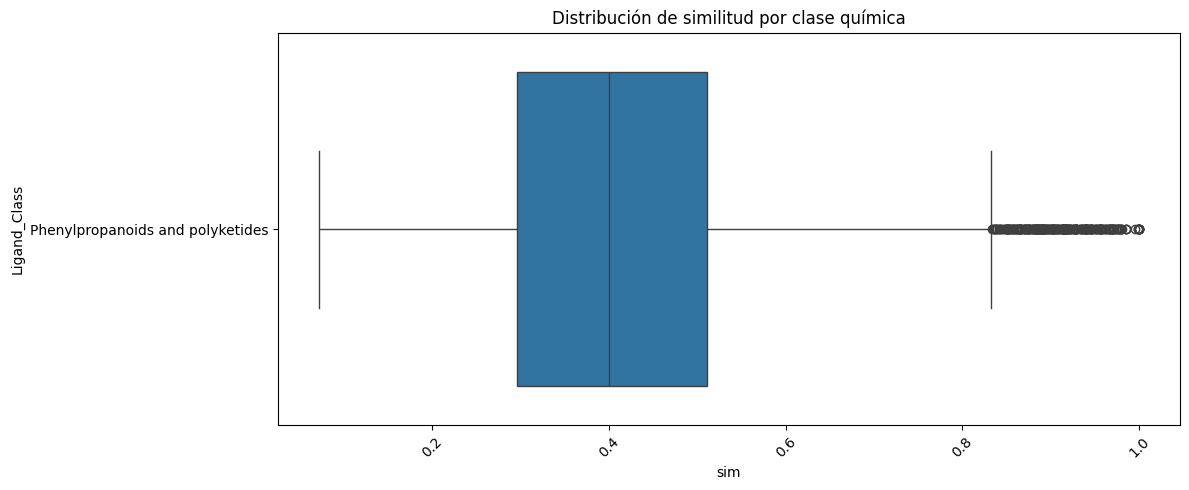

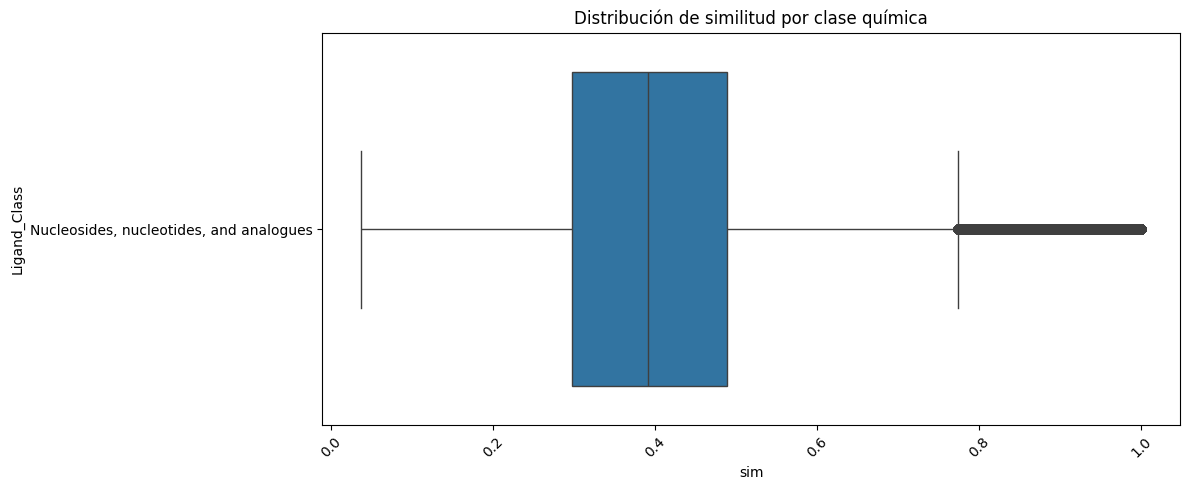

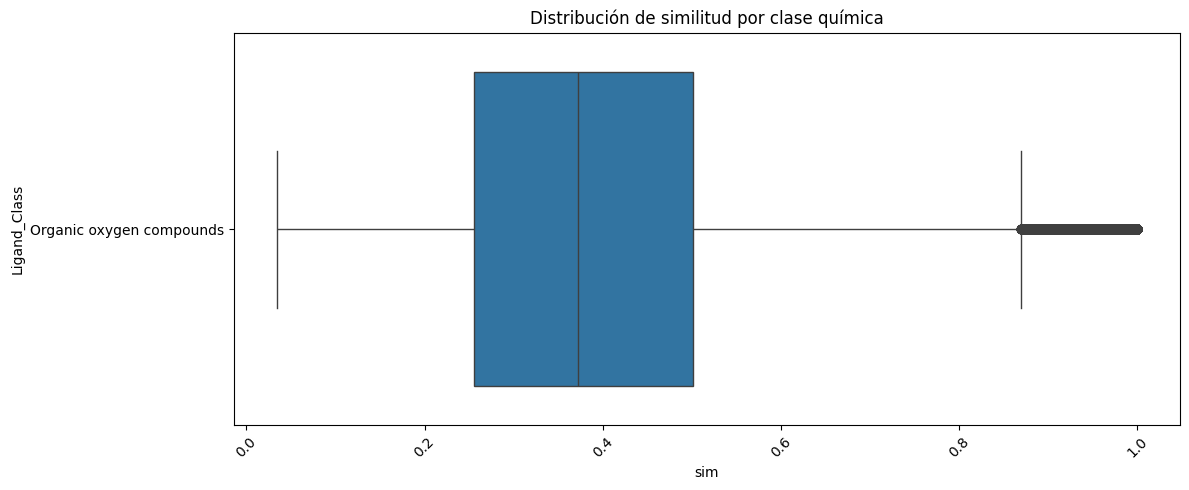

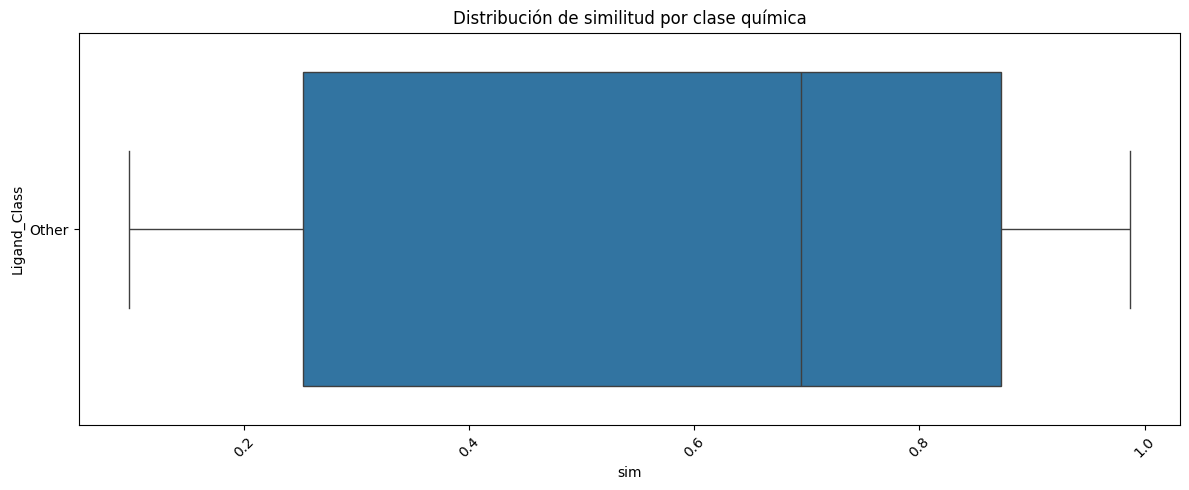

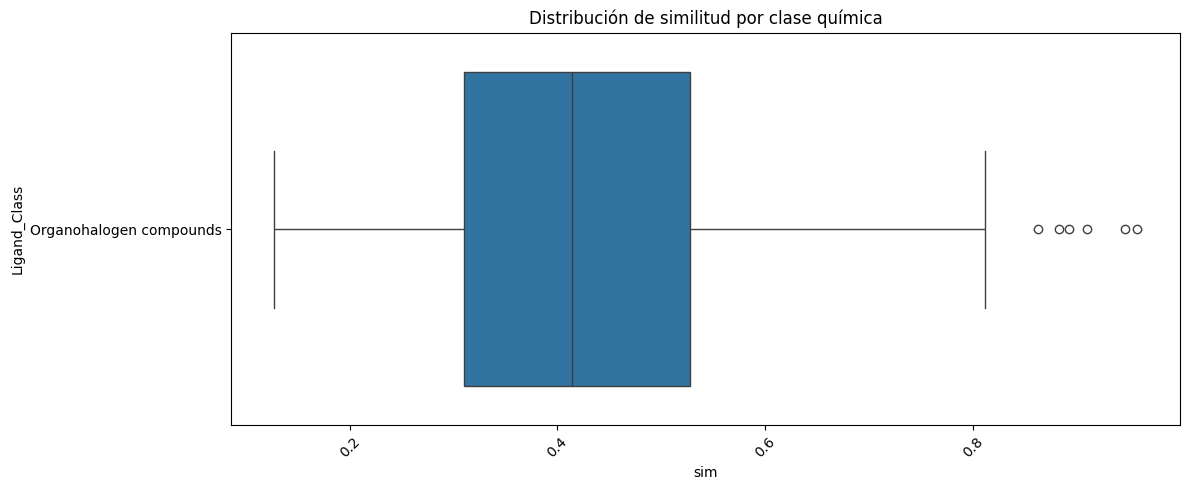

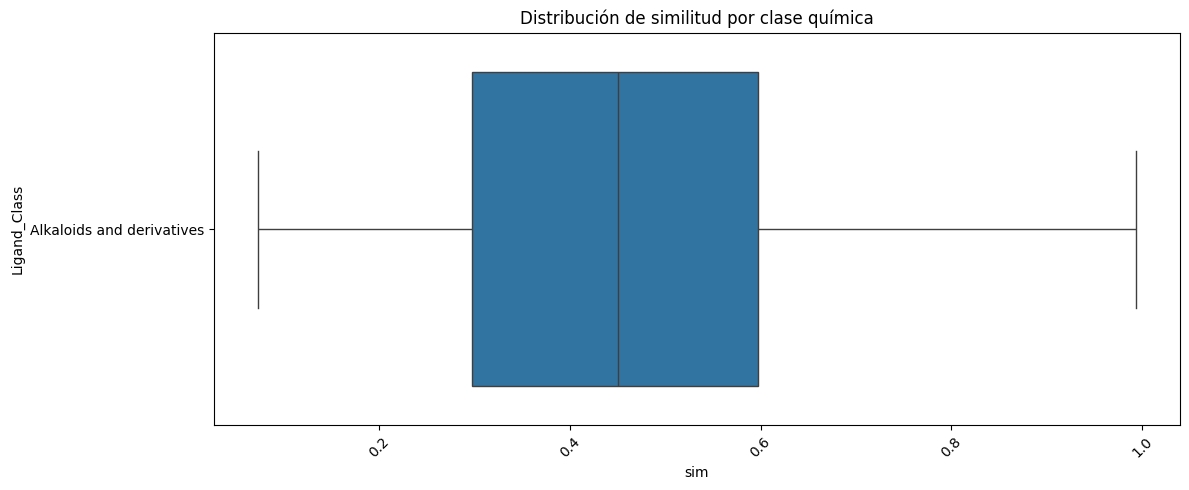

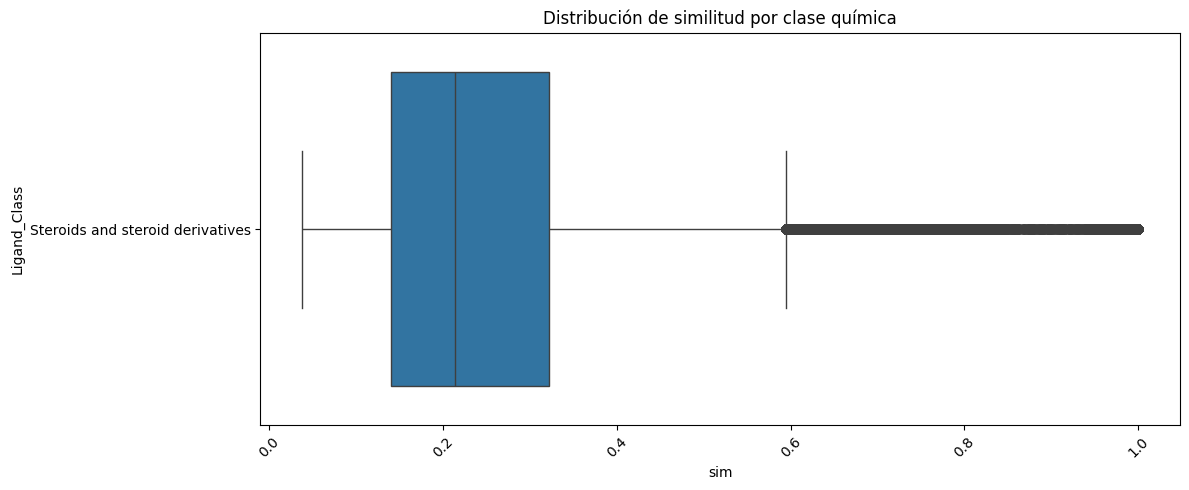

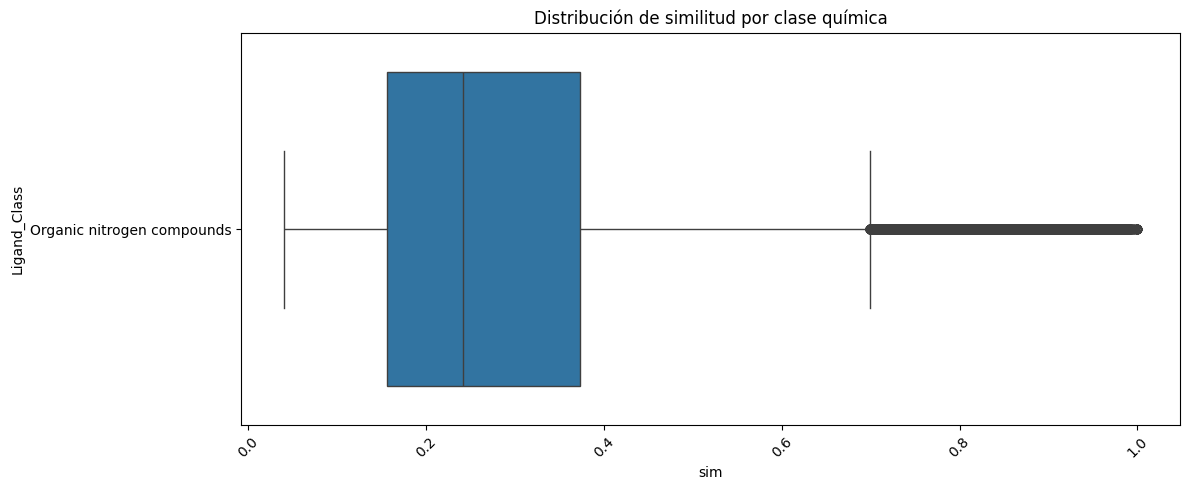

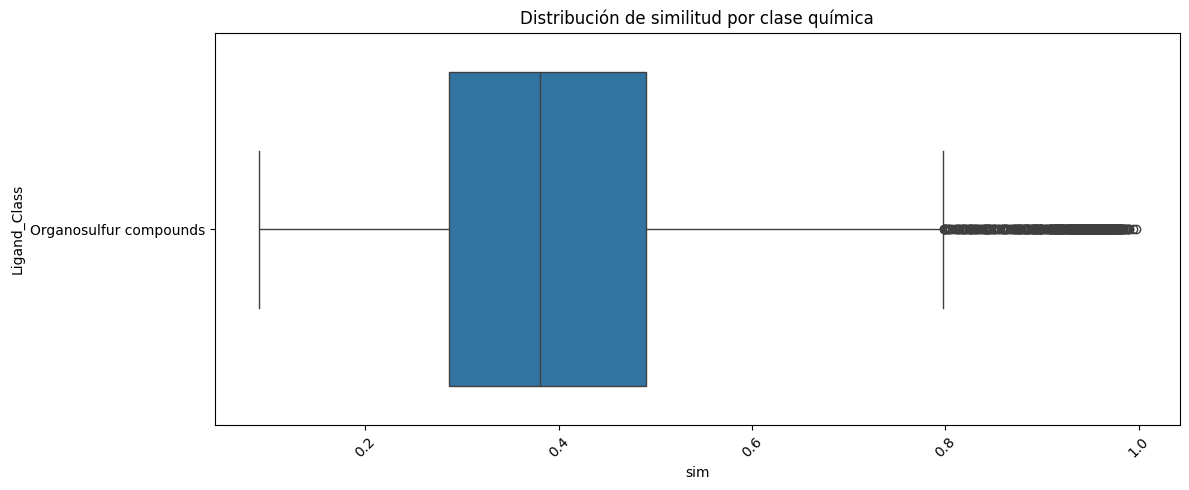

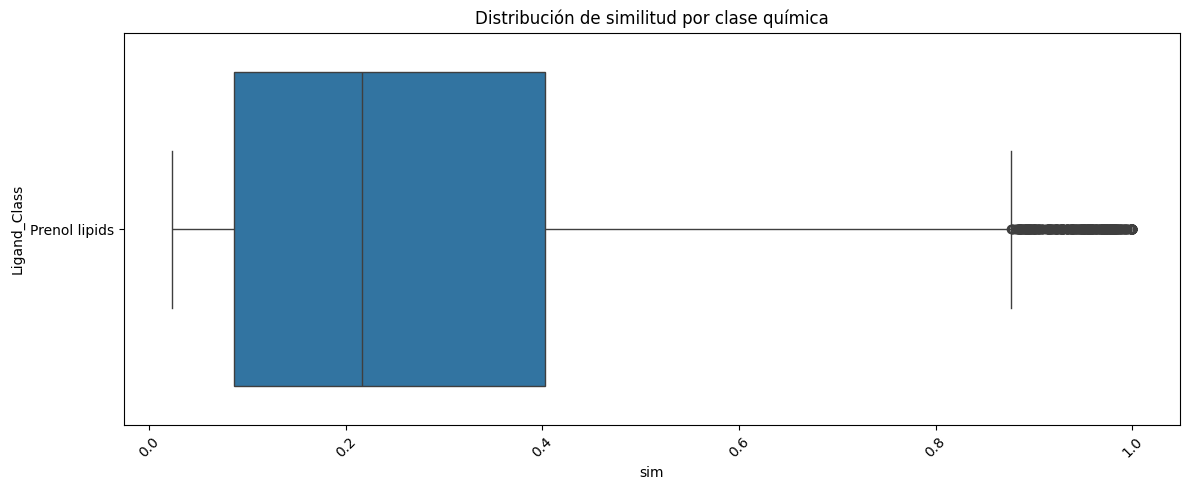

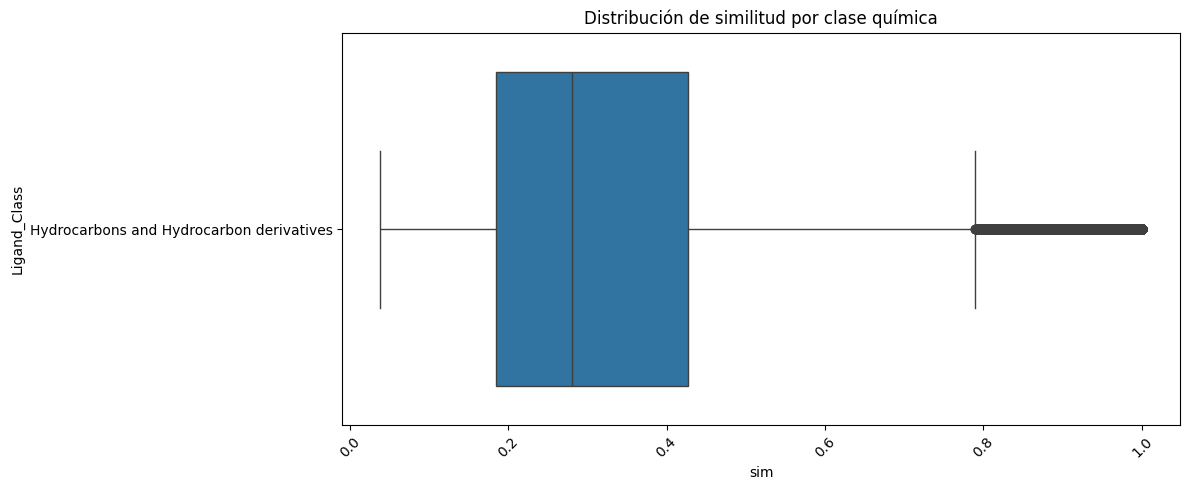

In [ ]:
#@title Boxplot flexibilidad ligandos por clases química

import seaborn as sns
import matplotlib.pyplot as plt

clases = df_unido_sitio['Ligand_Class'].unique()
clases = [i for i in clases if pd.notna(i)]

for clase in clases:
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df_unido_sitio[df_unido_sitio['Ligand_Class']== clase], x="sim", y="Ligand_Class")
    plt.xticks(rotation=45)
    plt.title(f"Distribución de similitud por clase química")
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
from scipy.stats import kruskal

# Agrupa por clase
grupos = [grupo["sim"].values for _, grupo in df_unido_sitio.groupby("Ligand_Class")]
stat, p = kruskal(*grupos)
print(f"Kruskal-Wallis H = {stat:.3f}, p = {p:.3e}")


Kruskal-Wallis H = 1654623.401, p = 0.000e+00


In [ ]:
from scipy.stats import mannwhitneyu
from itertools import combinations

for clase1, clase2 in combinations(df_unido_sitio['Ligand_Class'].unique(), 2):
    grupo1 = df_unido_sitio[df_unido_sitio['Ligand_Class'] == clase1]['sim']
    grupo2 = df_unido_sitio[df_unido_sitio['Ligand_Class'] == clase2]['sim']
    stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')
    print(f"{clase1} vs {clase2} → p = {p:.3e}")

Organic acids and derivatives vs Fatty Acyls → p = 0.000e+00
Organic acids and derivatives vs Glycerophospholipids → p = 0.000e+00
Organic acids and derivatives vs Organoheterocyclic compounds → p = 0.000e+00
Organic acids and derivatives vs Benzenoids → p = 0.000e+00
Organic acids and derivatives vs Phenylpropanoids and polyketides → p = 0.000e+00
Organic acids and derivatives vs Nucleosides, nucleotides, and analogues → p = 0.000e+00
Organic acids and derivatives vs Glycerolipids → p = 0.000e+00
Organic acids and derivatives vs Organic oxygen compounds → p = 0.000e+00
Organic acids and derivatives vs Organic 1,3-dipolar compounds → p = 9.716e-01
Organic acids and derivatives vs Organohalogen compounds → p = 6.446e-38
Organic acids and derivatives vs Alkaloids and derivatives → p = 2.060e-02
Organic acids and derivatives vs Steroids and steroid derivatives → p = 0.000e+00
Organic acids and derivatives vs nan → p = nan


<ipython-input-44-8b7aca3ec870>:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')


Organic acids and derivatives vs Sphingolipids → p = 8.295e-27
Organic acids and derivatives vs Lignans, neolignans and related compounds → p = 5.033e-16
Organic acids and derivatives vs Organic nitrogen compounds → p = 0.000e+00
Organic acids and derivatives vs Organosulfur compounds → p = 0.000e+00
Organic acids and derivatives vs Prenol lipids → p = 0.000e+00
Organic acids and derivatives vs Hydrocarbons → p = 0.000e+00
Organic acids and derivatives vs Organophosphorus compounds → p = 1.643e-02
Organic acids and derivatives vs Saccharolipids → p = 1.210e-13
Organic acids and derivatives vs Organic salts → p = 4.922e-41
Organic acids and derivatives vs Hydrocarbon derivatives → p = 2.205e-01
Organic acids and derivatives vs Organometallic compounds → p = 2.906e-06
Fatty Acyls vs Glycerophospholipids → p = 0.000e+00
Fatty Acyls vs Organoheterocyclic compounds → p = 0.000e+00
Fatty Acyls vs Benzenoids → p = 0.000e+00
Fatty Acyls vs Phenylpropanoids and polyketides → p = 0.000e+00
Fatty

In [ ]:
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations

# Define la función CLES
def cles(big, sma):
    return mannwhitneyu(big, sma).statistic / (len(big) * len(sma))

# Test global Kruskal-Wallis
grupos = [grupo["sim"].values for _, grupo in df_unido_sitio.groupby("Ligand_Class")]
stat, p = kruskal(*grupos)
print(f"Kruskal-Wallis H = {stat:.3f}, p = {p:.3e}")

# Comparaciones por pares con Mann-Whitney U y CLES
resultados = []

for clase1, clase2 in combinations(df_unido['Ligand_Class'].unique(), 2):
    grupo1 = df_unido_sitio[df_unido_sitio['Ligand_Class'] == clase1]['sim']
    grupo2 = df_unido_sitio[df_unido_sitio['Ligand_Class'] == clase2]['sim']

    stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')
    efecto = cles(grupo1, grupo2)

    print(f"{clase1} vs {clase2} → p = {p:.3e}, CLES = {efecto:.3f}")

    resultados.append({
        "clase1": clase1,
        "clase2": clase2,
        "p_value": p,
        "cles": efecto
    })

Kruskal-Wallis H = 1654623.401, p = 0.000e+00
Nucleosides, nucleotides, and analogues vs Other → p = 1.279e-06, CLES = 0.383
Nucleosides, nucleotides, and analogues vs Organic oxygen compounds → p = 0.000e+00, CLES = 0.530
Nucleosides, nucleotides, and analogues vs Organoheterocyclic compounds → p = 0.000e+00, CLES = 0.524
Nucleosides, nucleotides, and analogues vs Organic acids and derivatives → p = 0.000e+00, CLES = 0.355
Nucleosides, nucleotides, and analogues vs Phenylpropanoids and polyketides → p = 1.798e-11, CLES = 0.483
Nucleosides, nucleotides, and analogues vs Fatty Lipids → p = 0.000e+00, CLES = 0.765
Nucleosides, nucleotides, and analogues vs Benzenoids → p = 0.000e+00, CLES = 0.435
Nucleosides, nucleotides, and analogues vs Organosulfur compounds → p = 2.971e-12, CLES = 0.517
Nucleosides, nucleotides, and analogues vs Prenol lipids → p = 0.000e+00, CLES = 0.726
Nucleosides, nucleotides, and analogues vs Organic nitrogen compounds → p = 0.000e+00, CLES = 0.738
Nucleosides, 

<ipython-input-39-dbe01ac2432a>:20: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')
<ipython-input-39-dbe01ac2432a>:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return mannwhitneyu(big, sma).statistic / (len(big) * len(sma))


Nucleosides, nucleotides, and analogues vs nan → p = nan, CLES = nan
Nucleosides, nucleotides, and analogues vs Alkaloids and derivatives → p = 1.181e-09, CLES = 0.419
Nucleosides, nucleotides, and analogues vs Organohalogen compounds → p = 3.783e-11, CLES = 0.451
Other vs Organic oxygen compounds → p = 4.152e-08, CLES = 0.633
Other vs Organoheterocyclic compounds → p = 1.303e-06, CLES = 0.617
Other vs Organic acids and derivatives → p = 3.507e-03, CLES = 0.571
Other vs Phenylpropanoids and polyketides → p = 4.684e-06, CLES = 0.612
Other vs Fatty Lipids → p = 9.268e-28, CLES = 0.765
Other vs Benzenoids → p = 4.800e-05, CLES = 0.599
Other vs Organosulfur compounds → p = 9.345e-07, CLES = 0.619
Other vs Prenol lipids → p = 1.634e-30, CLES = 0.778
Other vs Organic nitrogen compounds → p = 1.866e-25, CLES = 0.753
Other vs Hydrocarbons and Hydrocarbon derivatives → p = 7.016e-18, CLES = 0.709
Other vs Steroids and steroid derivatives → p = 5.495e-32, CLES = 0.785
Other vs nan → p = nan, CLE

In [ ]:
df_resultados_sitios = pd.DataFrame(resultados)
df_resultados_sitios_sorted = df_resultados_sitios.sort_values(by="cles", ascending=False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una lista con todas las clases
clases = sorted(df_unido['Ligand_Class'].dropna().unique())


# Crear matriz vacía con NaNs
cles_matrix = pd.DataFrame(np.nan, index=clases, columns=clases)

# Rellenar la matriz con CLES
for res in resultados:
    c1, c2 = res["clase1"], res["clase2"]
    cles_val = res["cles"]
    cles_matrix.loc[c1, c2] = cles_val
    cles_matrix.loc[c2, c1] = 1 - cles_val  # Simetría inversa

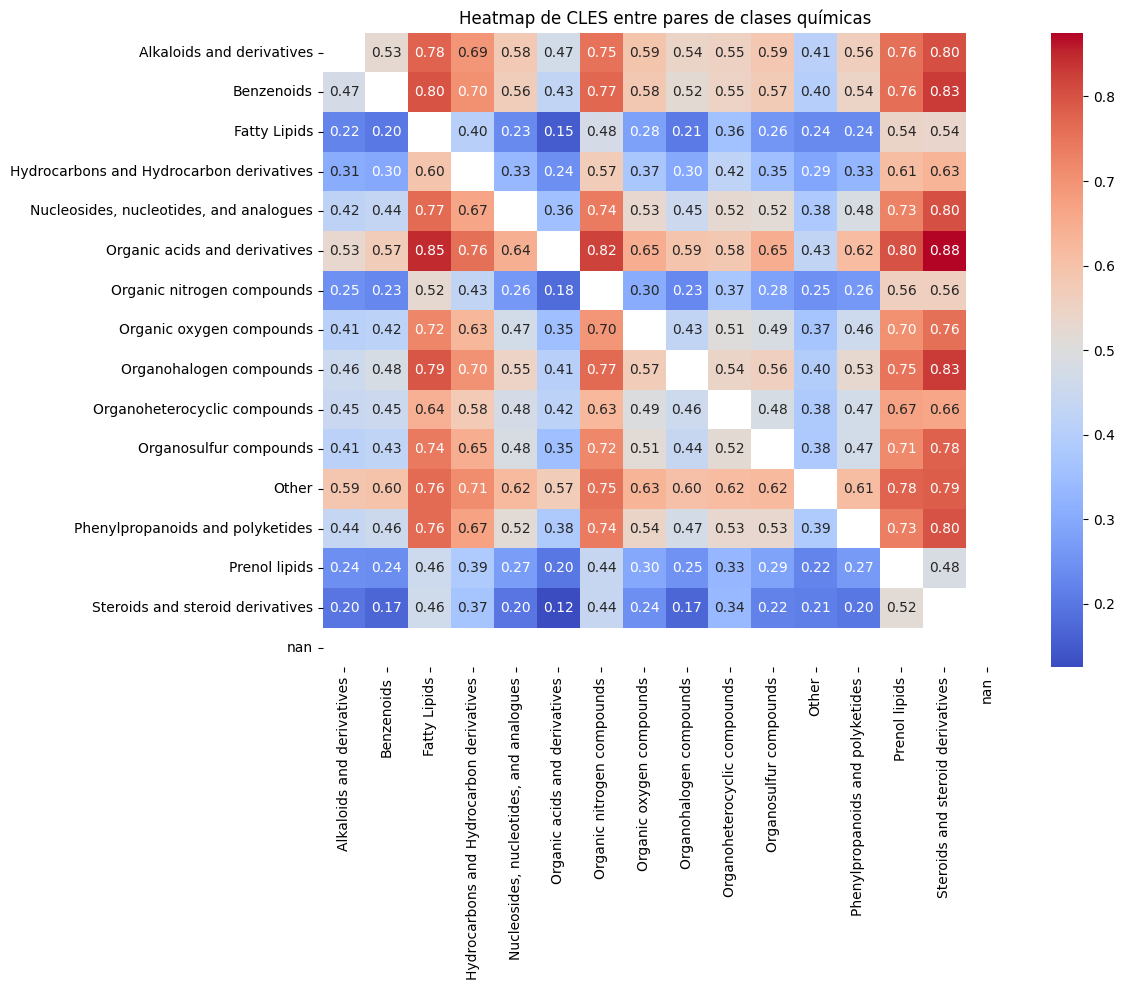

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(cles_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0.5)
plt.title("Heatmap de CLES entre pares de clases químicas")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Igual también es interesante representar adicionalmente autosimlitudes de USRRs de ligandos vs las de los correspondientes sitios de unión mediante un diagrama de dispersión: debería haber buena correlación.

Lo hago aqui (https://colab.research.google.com/drive/1UGHDOL4_eJoOpWZq0ICBfhV2hR6J0Cns#scrollTo=unRPpajew-dr)

## Análisis de variabilidad de sitios de unión vs clase de diana:

para cada proteína (uniprot id), extraer de la matriz de autosimilitudes de USRRs de sitios de unión los valores por encima de la diagonal. Juntar todos los valores de las proteínas de cada clase diana, y representar, para cada una de ellas, la distribución en forma de violín plot o box plot. Hacer los correspondientes test estadísticos.

In [ ]:
#@title Identificar conformaciones

import os
import pandas as pd

pair_dict = {}

carpeta_csv = "/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/USR_sitios_de_union_misma_proteina/Similarity_Matrices"

for archivo in os.listdir(carpeta_csv):
    if not archivo.endswith(".csv"):
        continue

    df = pd.read_csv(os.path.join(carpeta_csv, archivo))

    if 'conformation' in df.columns:
        df.index = df['conformation']
        df = df.drop(columns=['conformation'])

    df.index = (df.index
                .str.replace('_sitio.pdb', '', regex=False)
                .str.strip())
    df.columns = (df.columns
                  .str.replace('_sitio.pdb', '', regex=False)
                  .str.strip())

    names = df.index.tolist()

    for i in range(len(names)):
          for j in range(i+1, len(names)):
            sitio1, sitio2 = names[i], names[j]
            sim = df.iat[i, j]

            key = (sitio1, sitio2)
            pair_dict[key] = sim


# Convertir el dictionario a DataFrame
df_pairs = pd.DataFrame([
    {'sitio1': k[0], 'sitio2': k[1], 'sim': v}
    for k, v in pair_dict.items()
])

# Filtrar misma conformación y diferente conformación
df_mayor_06 = df_pairs[df_pairs['sim'] > 0.6].reset_index(drop=True)
df_menor_06 = df_pairs[df_pairs['sim'] <=  0.6].reset_index(drop=True)

print(f"Parejas únicas ≥0.6: {len(df_mayor_06)}")
print(f"Parejas únicas <0.6: {len(df_menor_06)}")

df_pairs.to_csv("/content/drive/MyDrive/TFM/T3/Archivos/df_parejas_sitios_sim_sitios.csv", sep=',', index=False)
print(df_pairs.shape[0])

Parejas únicas ≥0.6: 36691
Parejas únicas <0.6: 184593
221284


In [ ]:
df_pairs = pd.read_csv("/content/drive/MyDrive/TFM/T3/Archivos/df_parejas_sitios_sim_sitios.csv", sep=',')

In [ ]:
df_pairs.head()

sitio1           sitio2       sim
0  1A0G_PMP_A_285   1A0G_PMP_B_285  0.735826
1    1A52_EST_A_1     1A52_EST_B_2  0.944612
2  1A4M_PRH_A_354   1A4M_PRH_B_854  0.735893
3  1A4M_PRH_A_354  1A4M_PRH_C_1354  0.678269
4  1A4M_PRH_A_354  1A4M_PRH_D_1854  0.813626

In [ ]:
#@title Definir función extraer ligando

def find_pdb_instances_sitio(row: pd.Series) -> str:
  instance = row['sitio1']
  pdb = instance.split("_")[0]
  return pdb

In [ ]:
#@title Aplicar función al df similitudes

from pandarallel import pandarallel

pandarallel.initialize(nb_workers= 2, progress_bar= True)

df_pairs['PDB_entry_id'] = df_pairs.parallel_apply(find_pdb_instances_sitio, axis = 1)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
df_final.columns

Index(['PDB_entry_id', 'Classification', 'Organism', 'Uniprot_id', 'Ligand_id',
       'Ligand_InChi', 'Experimental_method', 'Resolution',
       'Adding_Classification', 'Affinity', 'Coordenadas', 'Ligand_smiles',
       'Mol_Weight', 'n_atoms', 'Nombre', 'Ligand_Class', 'Pfam_Names',
       'SUPFAM_Names', 'intepro_class'],
      dtype='object')

In [ ]:
#@title Clases químicas ligandos

df_uniprot = df_final[['PDB_entry_id','Uniprot_id','intepro_class']]
df_uniprot = df_uniprot.drop_duplicates(subset="Uniprot_id").reset_index(drop=True)
df_uniprot.shape[0]

9875

In [ ]:
df_unido_sitio_uniprot = df_pairs.merge(df_uniprot, on = "PDB_entry_id", how = "left")
df_unido_sitio_uniprot.shape[0]

221284

In [ ]:
df_unido_sitio_uniprot.head(20)

sitio1           sitio2       sim PDB_entry_id Uniprot_id  \
0    1A0G_PMP_A_285   1A0G_PMP_B_285  0.735826         1A0G     P19938   
1      1A52_EST_A_1     1A52_EST_B_2  0.944612         1A52        NaN   
2    1A4M_PRH_A_354   1A4M_PRH_B_854  0.735893         1A4M     P03958   
3    1A4M_PRH_A_354  1A4M_PRH_C_1354  0.678269         1A4M     P03958   
4    1A4M_PRH_A_354  1A4M_PRH_D_1854  0.813626         1A4M     P03958   
5    1A4M_PRH_B_854  1A4M_PRH_C_1354  0.772243         1A4M     P03958   
6    1A4M_PRH_B_854  1A4M_PRH_D_1854  0.695686         1A4M     P03958   
7   1A4M_PRH_C_1354  1A4M_PRH_D_1854  0.607215         1A4M     P03958   
8   1A3W_FBP_A_1007  1A3W_FBP_B_1008  0.704361         1A3W     P00549   
9   1A3W_FBP_A_1007  1A3W_PGA_A_1005  0.562884         1A3W     P00549   
10  1A3W_FBP_A_1007  1A3W_PGA_B_1006  0.561151         1A3W     P00549   
11  1A3W_FBP_B_1008  1A3W_PGA_A_1005  0.572607         1A3W     P00549   
12  1A3W_FBP_B_1008  1A3W_PGA_B_1006  0.570703         1A3W     P00549   
13  1A3W_PGA_A_1005  1A3W_PGA_B_1006  0.987026         1A3W     P00549   
14   1LBZ_FBP_A_295   1LBZ_FBP_B_595  0.335398         1LBZ        NaN   
15   1LCA_CB3_A_318   1LCA_UMP_A_317  0.189068         1LCA        NaN   
16   1LCB_DHF_A_318   1LCB_TMP_A_317  0.537650         1LCB        NaN   
17   1LCO_PPY_A_580   1LCO_PPY_B_580  0.507216         1LCO     P00175   
18   1LDA_BOG_A_473   1LDA_BOG_A_474  0.299841         1LDA        NaN   
19   1LDF_BOG_A_473   1LDF_BOG_A_474  0.438426         1LDF        NaN   

    intepro_class  
0   Aminotrans_IV  
1             NaN  
2   A/AMP_deam_AS  
3   A/AMP_deam_AS  
4   A/AMP_deam_AS  
5   A/AMP_deam_AS  
6   A/AMP_deam_AS  
7   A/AMP_deam_AS  
8       Pyr_Knase  
9       Pyr_Knase  
10      Pyr_Knase  
11      Pyr_Knase  
12      Pyr_Knase  
13      Pyr_Knase  
14            NaN  
15            NaN  
16            NaN  
17   Aldolase_TIM  
18            NaN  
19            NaN

In [ ]:

top_20_clases = df_unido_sitio_uniprot['Uniprot_id'].value_counts().head(20).index

df_top20 = df_unido_sitio_uniprot[df_unido_sitio_uniprot['Uniprot_id'].isin(top_20_clases)]


In [ ]:
df_top20.head()

sitio1          sitio2       sim PDB_entry_id Uniprot_id  \
73735  4XLZ_HEZ_A_305  4XLZ_HEZ_A_306  0.293804         4XLZ     Q8U3V1   
73736  4XLZ_HEZ_A_305  4XLZ_HEZ_A_307  0.216857         4XLZ     Q8U3V1   
73737  4XLZ_HEZ_A_305  4XLZ_HEZ_A_308  0.281284         4XLZ     Q8U3V1   
73738  4XLZ_HEZ_A_305  4XLZ_HEZ_A_309  0.247322         4XLZ     Q8U3V1   
73739  4XLZ_HEZ_A_305  4XLZ_HEZ_A_310  0.161403         4XLZ     Q8U3V1   

                       intepro_class  
73735  GlcNAc_PI_deacetylase-related  
73736  GlcNAc_PI_deacetylase-related  
73737  GlcNAc_PI_deacetylase-related  
73738  GlcNAc_PI_deacetylase-related  
73739  GlcNAc_PI_deacetylase-related

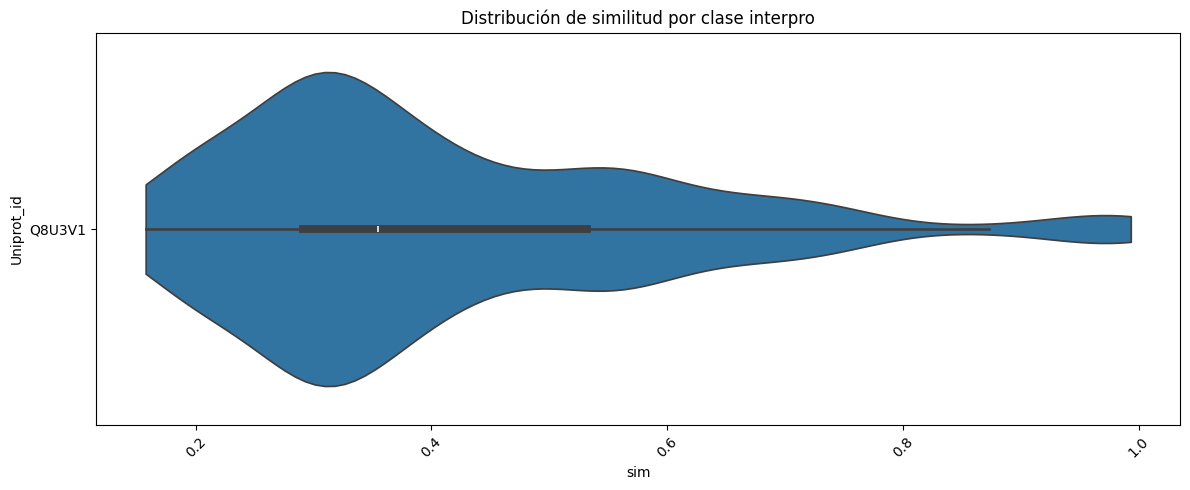

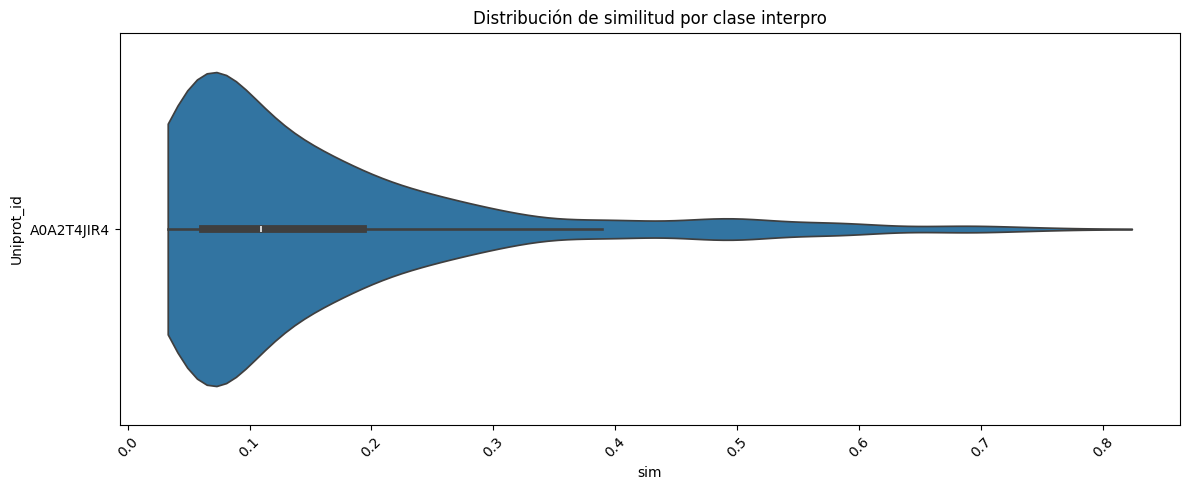

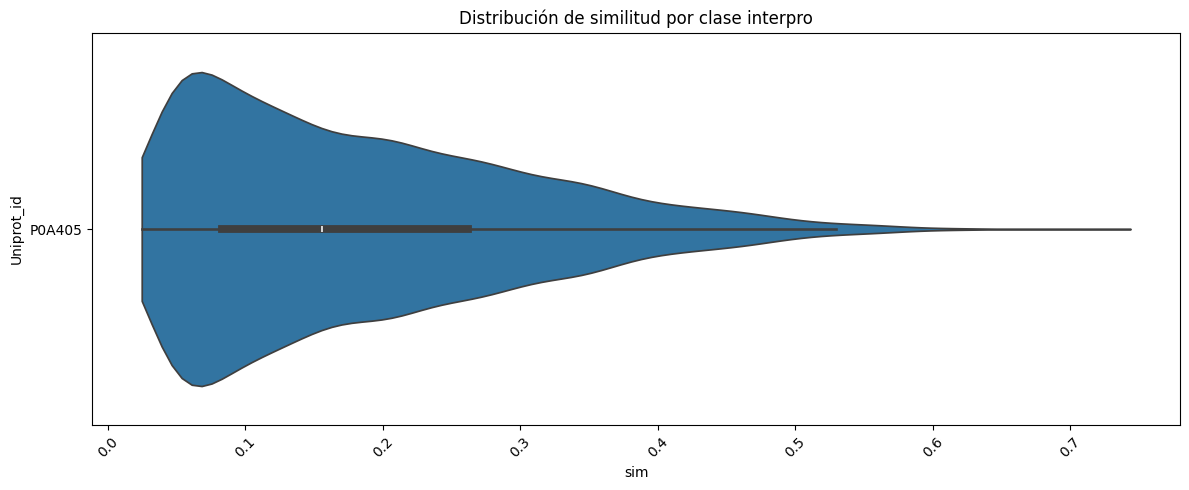

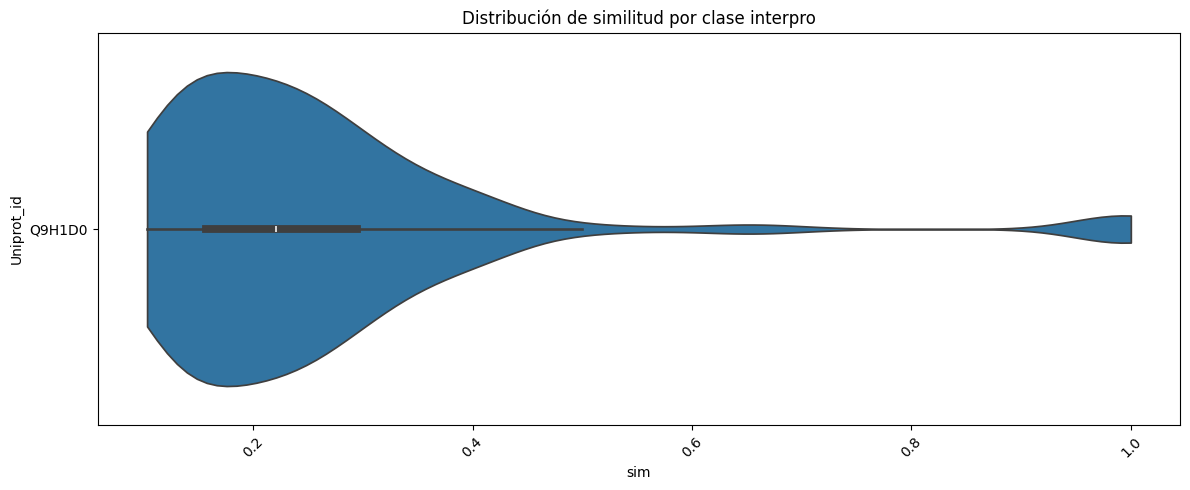

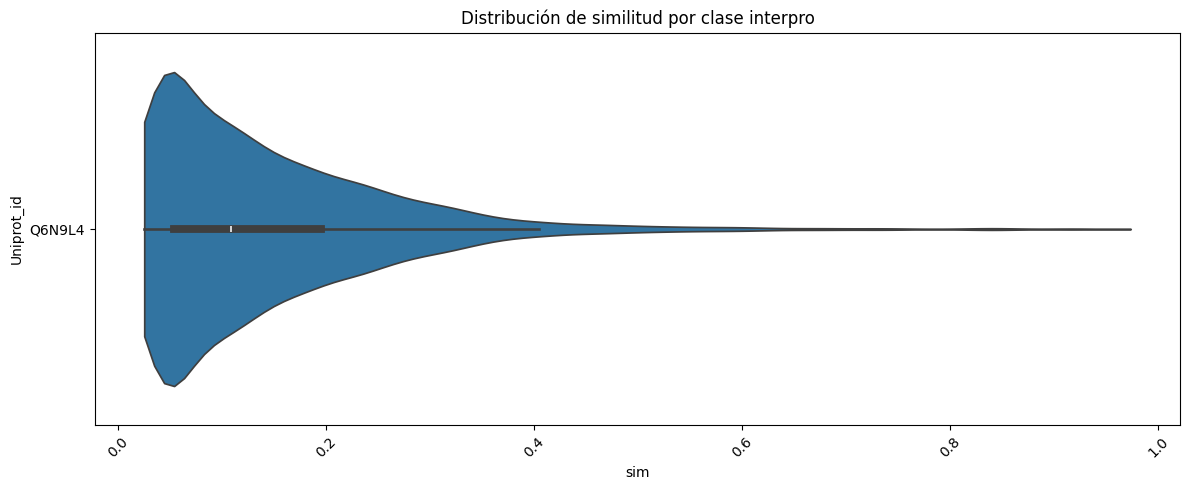

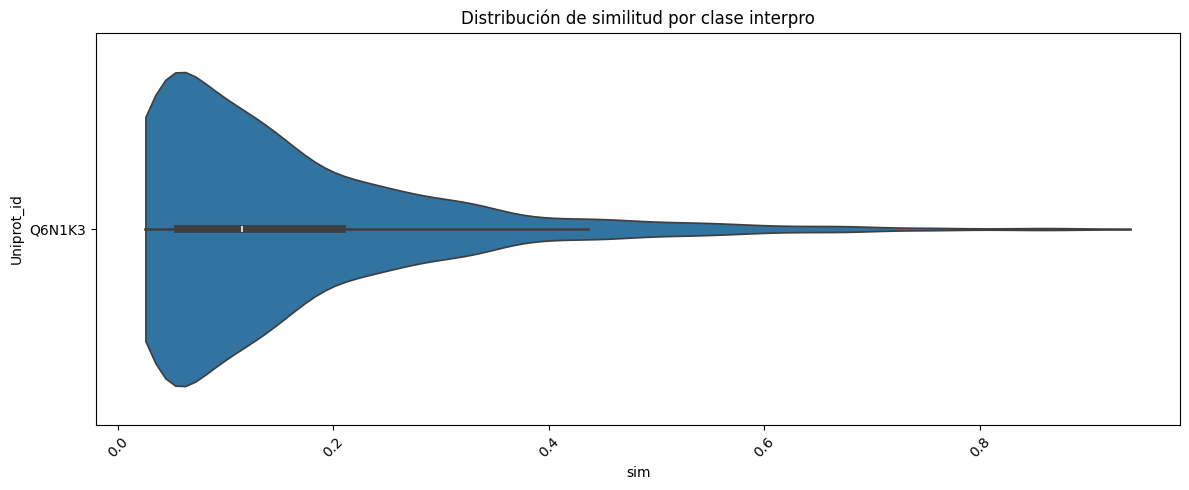

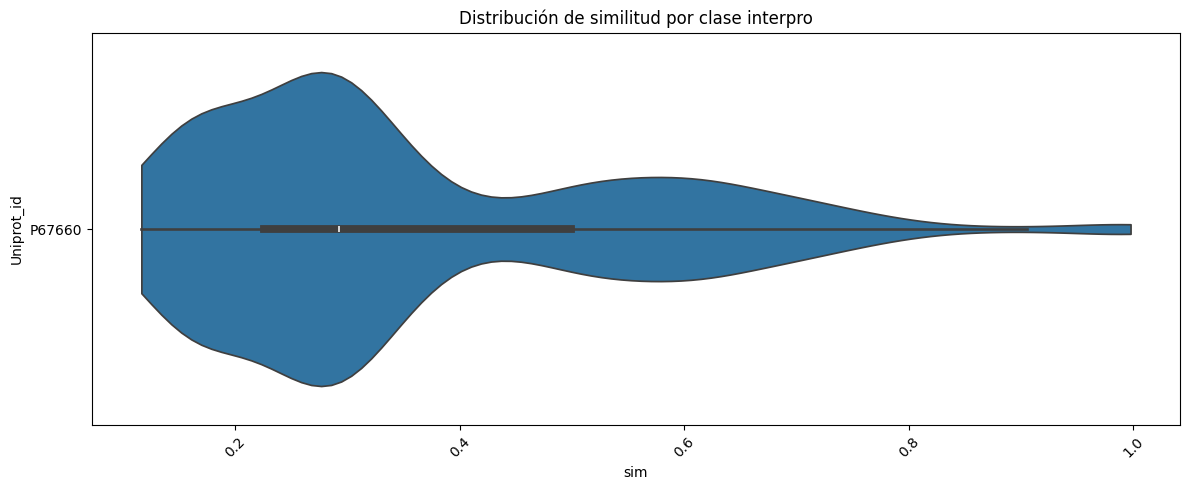

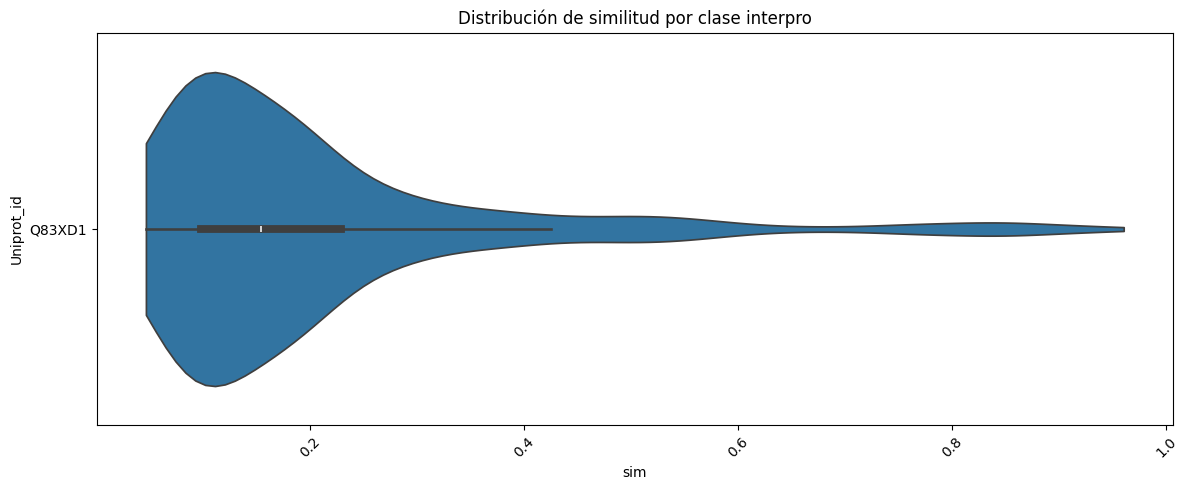

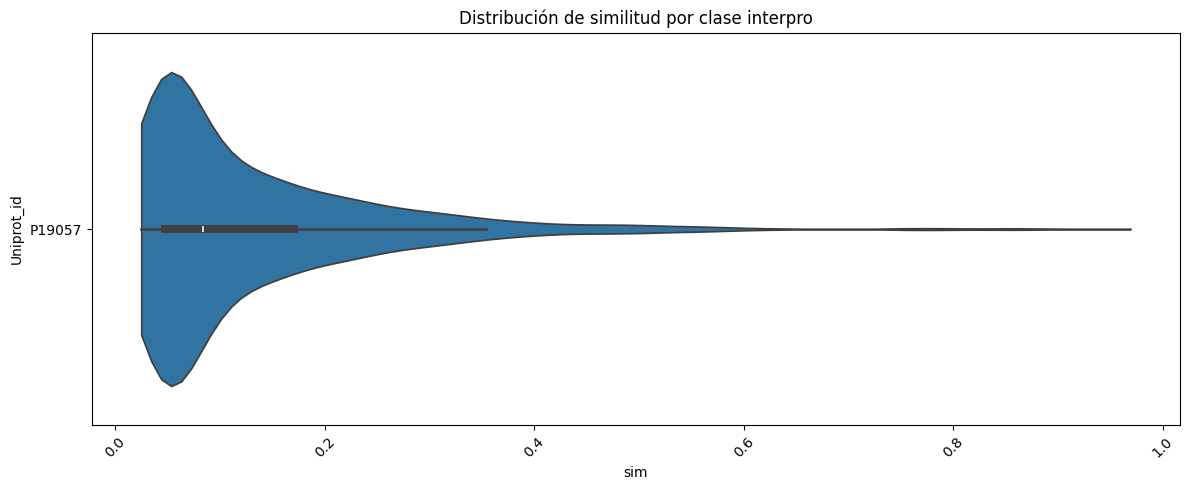

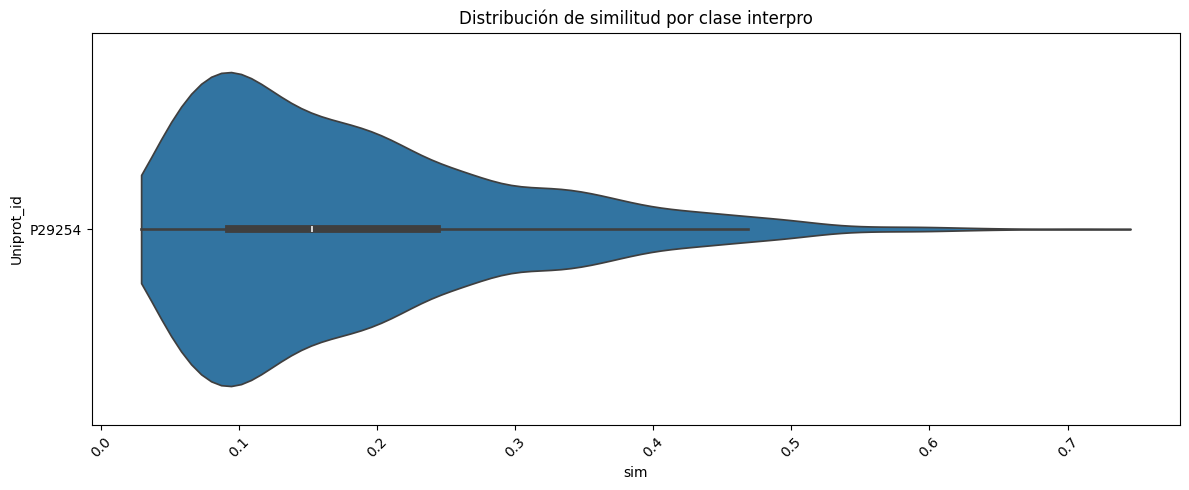

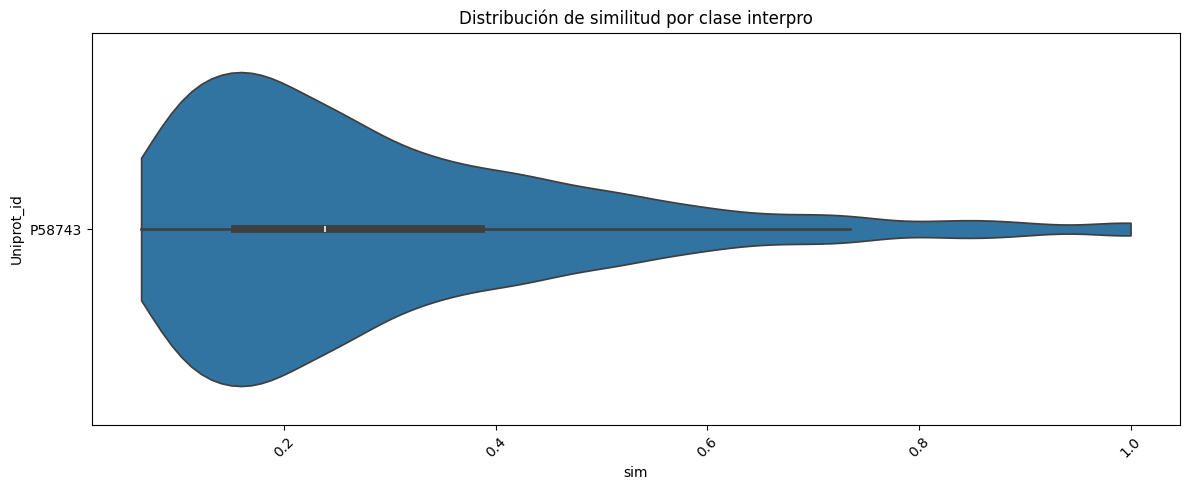

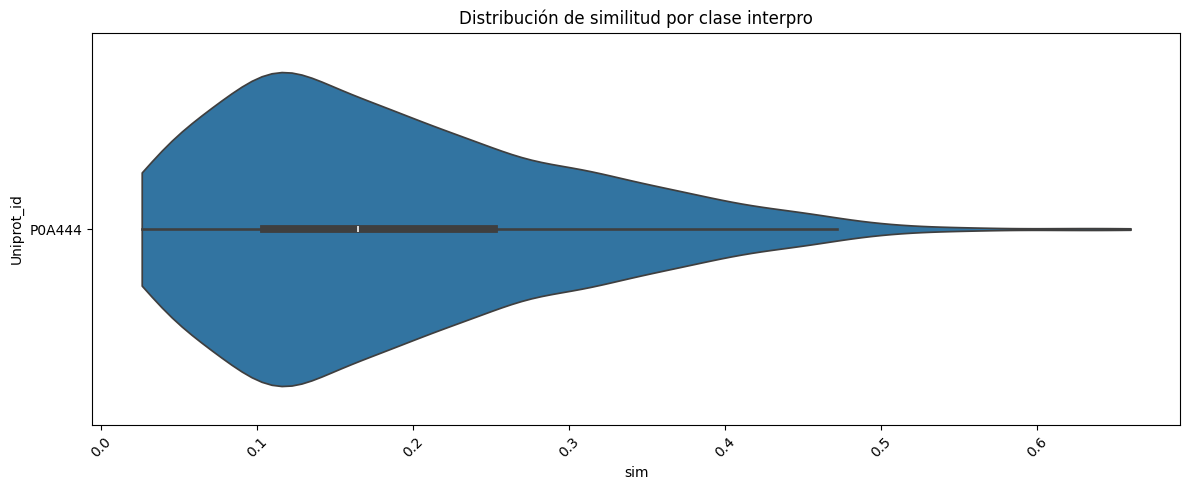

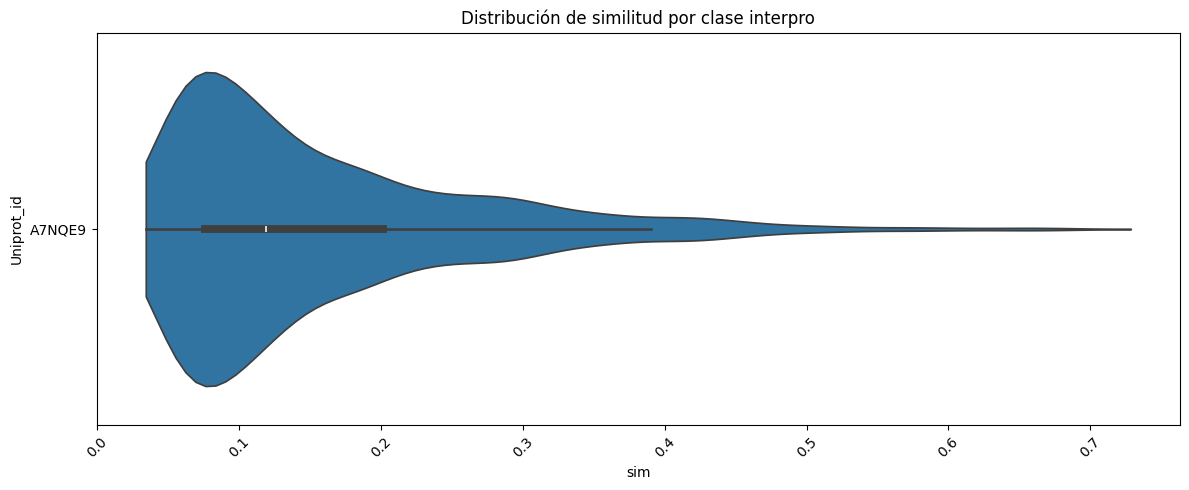

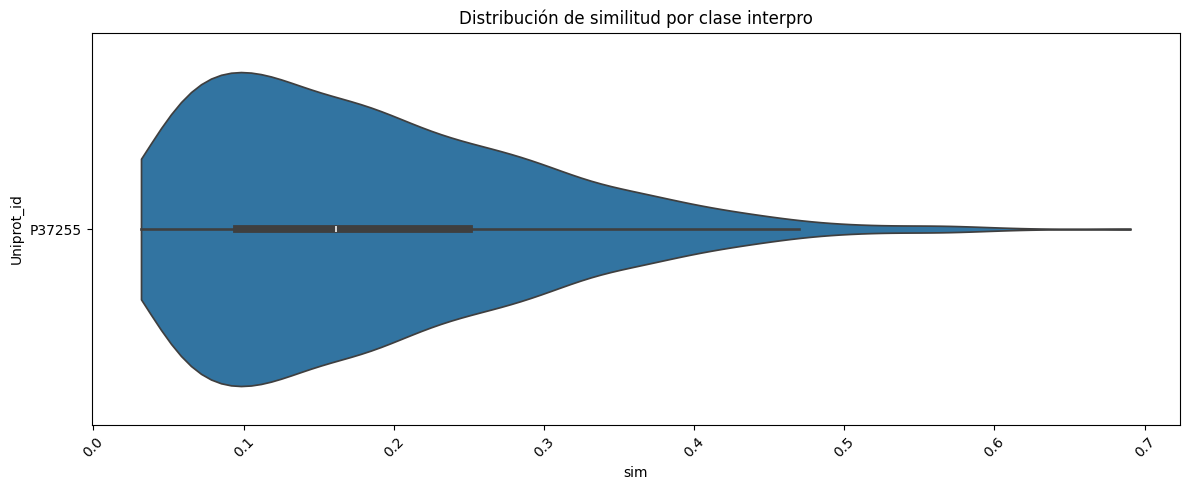

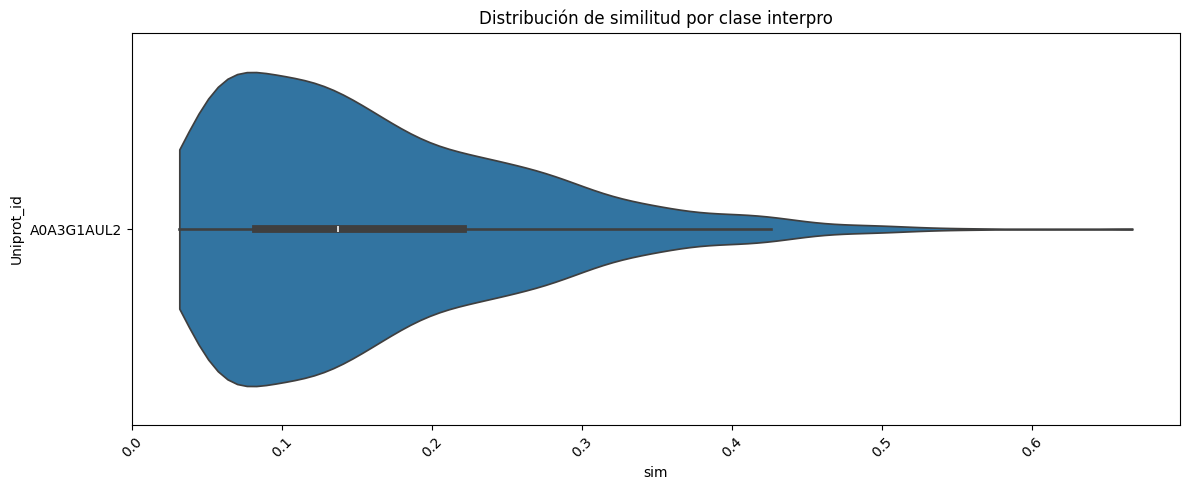

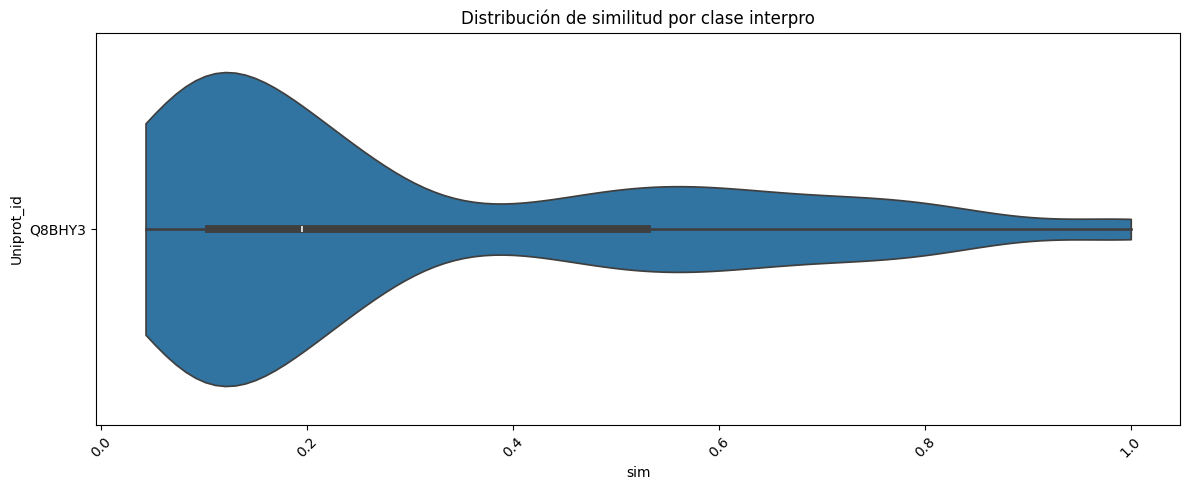

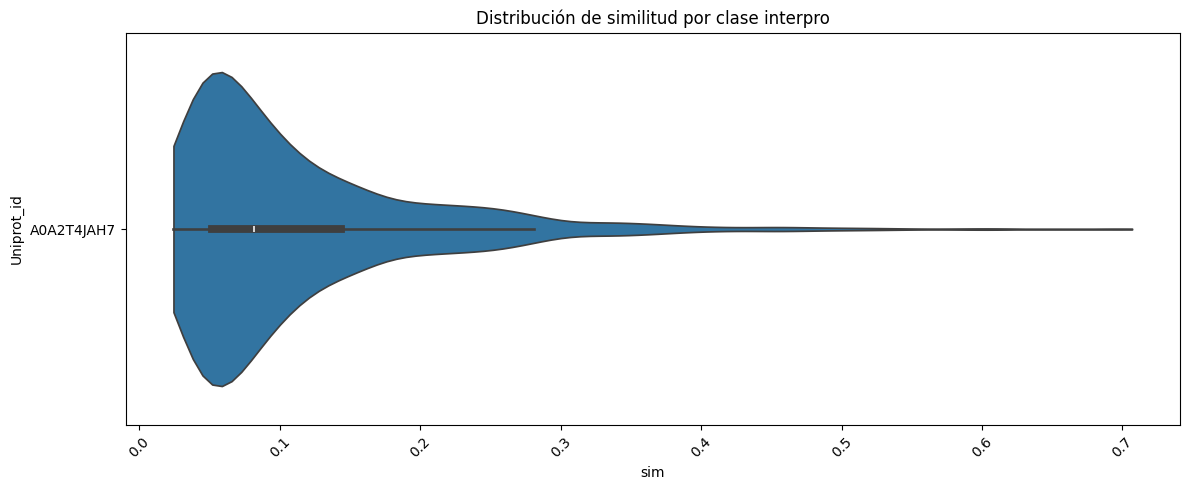

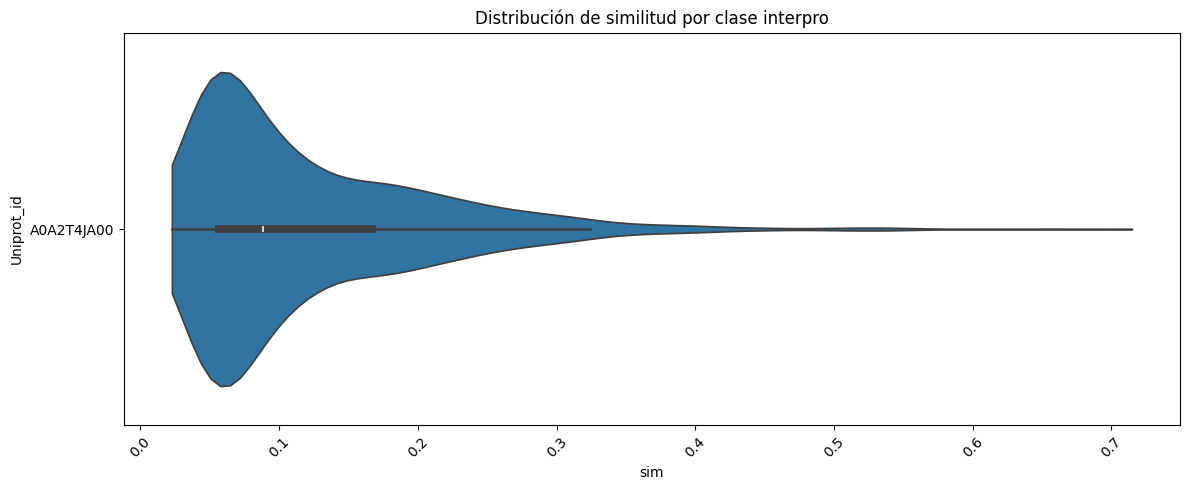

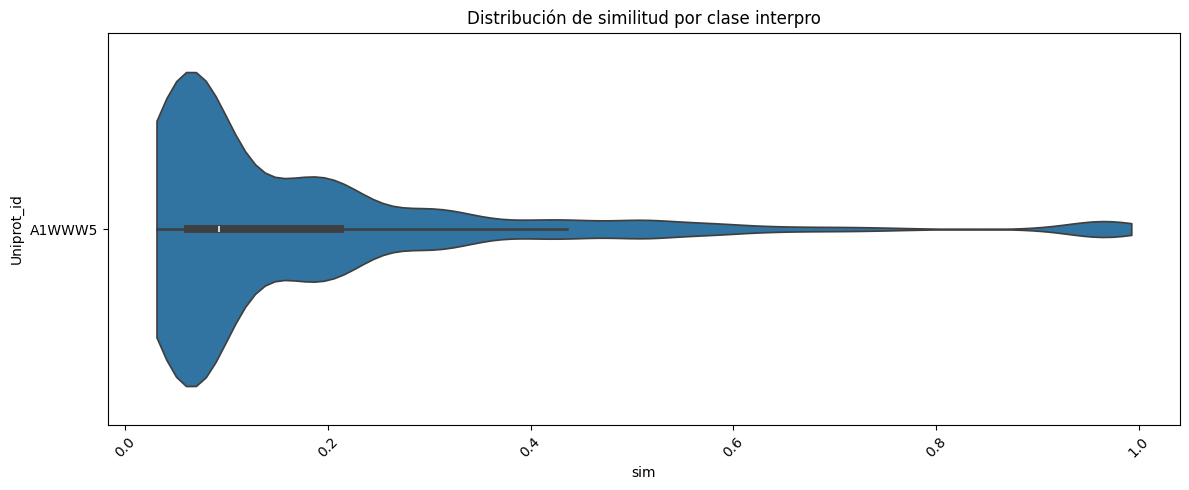

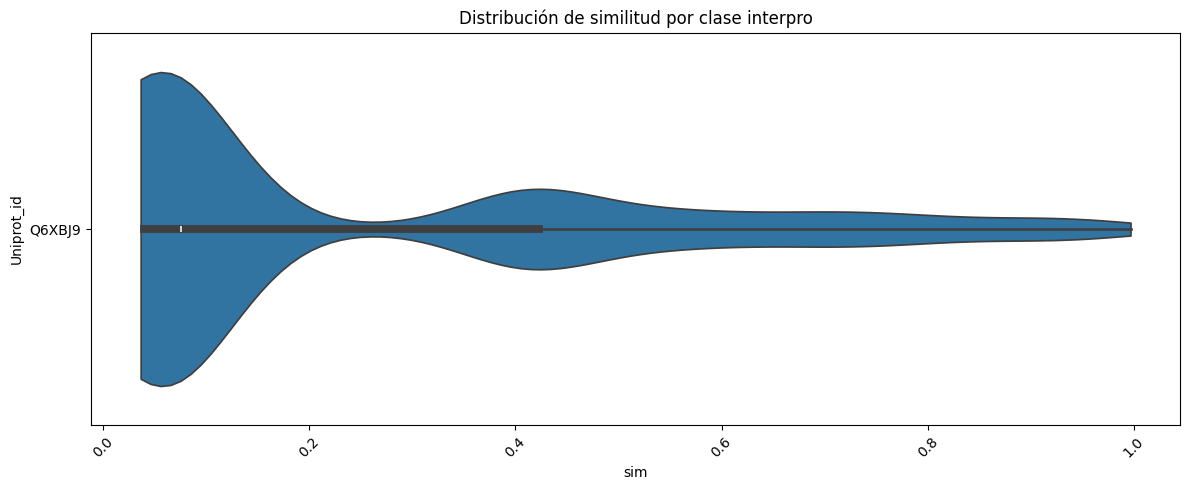

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

clases = df_top20['Uniprot_id'].unique()

for clase in clases:
    plt.figure(figsize=(12, 5))
    sns.violinplot(data=df_top20[df_top20['Uniprot_id']== clase], x="sim", y="Uniprot_id", cut=0)
    plt.xticks(rotation=45)
    plt.title(f"Distribución de similitud por clase interpro")
    plt.tight_layout()
    plt.show()
    plt.close()

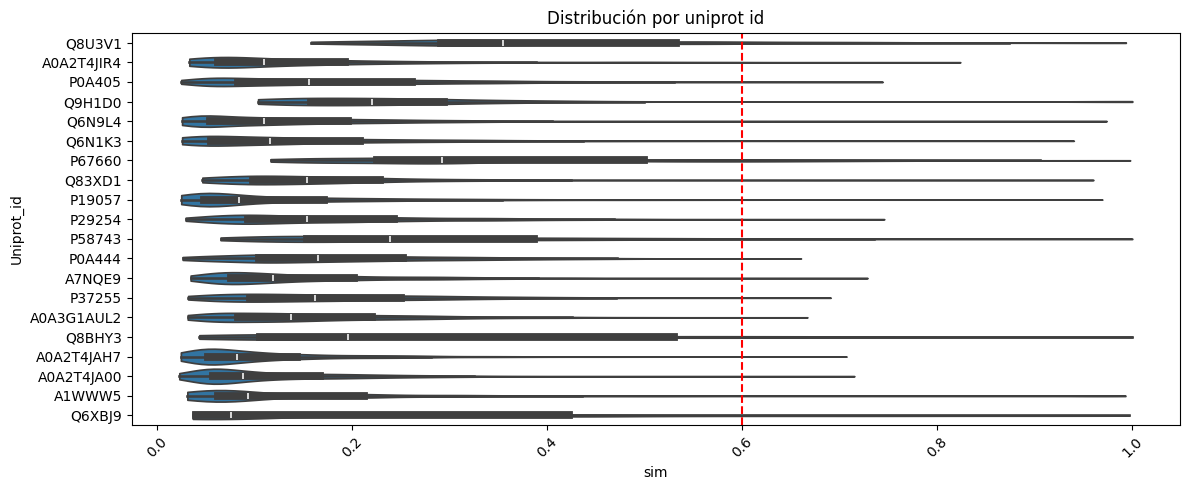

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.violinplot(data=df_top20, x="sim", y="Uniprot_id", cut=0)
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=1.5)
plt.xticks(rotation=45)
plt.title(f"Distribución por uniprot id")
plt.tight_layout()
plt.show()
plt.close()

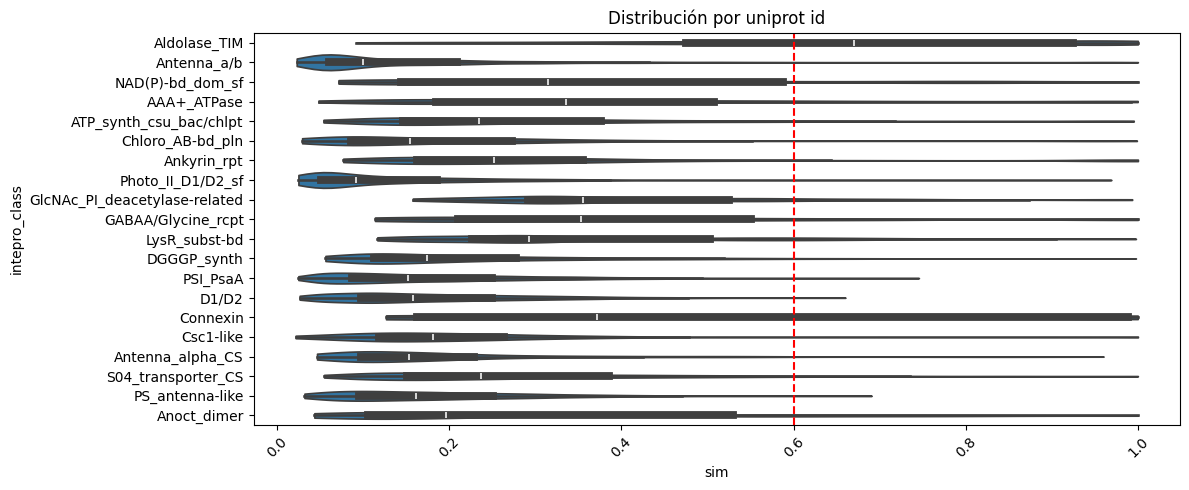

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.violinplot(data=df_top20, x="sim", y="intepro_class", cut=0)
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=1.5)
plt.xticks(rotation=45)
plt.title(f"Distribución por uniprot id")
plt.tight_layout()
plt.show()
plt.close()